# Initial thoughts on Data Preprocessing

## PR100 Data
### Boundaries
#### coastal_zone_mgmt_act_boundary.parquet:

Preprocessing: Convert to a binary mask indicating coastal management zones.
Usage: Use to identify areas with special coastal regulations that might affect installation.
federal_and_state_waters.parquet:

Preprocessing: Convert to a binary mask indicating water body boundaries.
Usage: Helps in avoiding water bodies for installations.

#### land_protected_areas.parquet:

Preprocessing: Convert to a binary mask indicating protected land areas.
Usage: Important for ensuring installations do not encroach on protected lands.
Habitat

#### areas_protegidas_agencia.parquet:

Preprocessing: Convert to a binary mask for protected habitat areas.
Usage: To avoid ecological sensitive areas for installations.

#### artificial_reefs.parquet:

Preprocessing: May not be directly relevant unless considering offshore installations.
Usage: If used, it helps in identifying ecological considerations for offshore wind farms.

#### coastal_critical_habitat_designations.tif:

Preprocessing: Raster to binary mask conversion for critical habitats.
Usage: Critical for conservation, so installations must avoid these areas.

#### land_nationwide_hapc.parquet, marine_protected_areas.parquet, nationwide_hapc.parquet:

Preprocessing: Convert each to binary masks indicating various protected areas.
Usage: Ensure that these environmentally sensitive areas are avoided.

### Hazards
#### danger_zones_and_restricted_areas.parquet
Preprocessing: Convert to binary masks indicating hazardous areas.
Usage: Use these layers to avoid placing installations in areas with high risk or legal restrictions.
#### ocean_disposal_sites.parquet
Preprocessing: Convert to binary masks indicating hazardous areas.
Usage: Use these layers to avoid placing installations in areas with high risk or legal restrictions.
#### tropical_cyclone_storm_segments.parquet
Preprocessing: TODO -- what does this data look like?
Usage: 
#### tropical_cyclone_wind_exposure.parquet
Preprocessing:  TODO -- what does this data look like?
Usage: 
#### unexploded_ordinance_areas.parquet
Preprocessing: Convert all to binary masks indicating hazardous areas.
Usage: Use these layers to avoid placing installations in areas with high risk or legal restrictions.
#### unexploded_ordinance_areas_fuds.parquet
Preprocessing: Convert all to binary masks indicating hazardous areas.
Usage: Use these layers to avoid placing installations in areas with high risk or legal restrictions.
#### wrecks_and_obstructions.parquet:
Preprocessing: Convert all to binary masks indicating hazardous areas.
Usage: Use these layers to avoid placing installations in areas with high risk or legal restrictions.

### Infrastructure
#### pipeline_areas.parquet
Preprocessing: Convert each to binary masks indicating infrastructure-related constraints.
Usage: These layers help in avoiding conflicts with existing infrastructure and adhering to setback regulations.
#### setbacks_airport.parquet
Preprocessing: Convert each to binary masks indicating infrastructure-related constraints.
Usage: These layers help in avoiding conflicts with existing infrastructure and adhering to setback regulations.
#### setbacks_buildings.parquet
Preprocessing: Convert each to binary masks indicating infrastructure-related constraints.
Usage: These layers help in avoiding conflicts with existing infrastructure and adhering to setback regulations.
#### setbacks_roads.parquet
Preprocessing: Convert each to binary masks indicating infrastructure-related constraints.
Usage: These layers help in avoiding conflicts with existing infrastructure and adhering to setback regulations.
#### setbacks_runway.parquet
Preprocessing: Convert each to binary masks indicating infrastructure-related constraints.
Usage: These layers help in avoiding conflicts with existing infrastructure and adhering to setback regulations.
#### setbacks_xmission.parquet
Preprocessing: Convert each to binary masks indicating infrastructure-related constraints.
Usage: These layers help in avoiding conflicts with existing infrastructure and adhering to setback regulations.

### Topography
#### bathymetry.tif
Preprocessing: Convert to continuous variable.
Usage: Topographical features are crucial for determining the suitability of areas for installations, especially considering accessibility, construction challenges, and efficiency.
#### dist_to_shore.tif
Preprocessing: Convert to continuous variable.
Usage: Topographical features are crucial for determining the suitability of areas for installations, especially considering accessibility, construction challenges, and efficiency.
#### elevation.tif
Preprocessing: Convert to continuous variable.
Usage: Topographical features are crucial for determining the suitability of areas for installations, especially considering accessibility, construction challenges, and efficiency.
#### slope.tif
Preprocessing: Convert to continuous variable.
Usage: Topographical features are crucial for determining the suitability of areas for installations, especially considering accessibility, construction challenges, and efficiency.
#### water_bodies.parquet:
Preprocessing: Convert to binary mask.
Usage: Topographical features are crucial for determining the suitability of areas for installations, especially considering accessibility, construction challenges, and efficiency.

## Inspect TIF files

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import geopandas as gpd

from shapely.wkt import loads
from shapely.geometry import Polygon, MultiPolygon

from shapely import wkt

import os

In [2]:
def load_tif(file_path):
    """Load a TIFF file and return the dataset."""
    return rasterio.open(file_path)

In [3]:
def inspect_metadata(dataset):
    """Print metadata of the TIFF dataset."""
    print(f"Width: {dataset.width}")
    print(f"Height: {dataset.height}")
    print(f"Number of bands: {dataset.count}")
    print(f"Data type: {dataset.dtypes}")
    print(f"Coordinate Reference System: {dataset.crs}")

In [4]:
def display_image(dataset):
    """Display the first band of the dataset."""
    band1 = dataset.read(1)
    plt.imshow(band1, cmap='gray')
    plt.colorbar(label='DN Values')
    plt.title('Raster Data Visualization')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

In [5]:
def calculate_statistics(dataset):
    """Calculate and print statistics for each band."""
    for i in range(1, dataset.count + 1):
        band = dataset.read(i)
        print(f"Statistics for Band {i}:")
        print(f"  Mean: {np.mean(band)}")
        print(f"  Median: {np.median(band)}")
        print(f"  Standard Deviation: {np.std(band)}")

In [6]:
def plot_histogram(dataset):
    """Plot histograms for each band."""
    for i in range(1, dataset.count + 1):
        band = dataset.read(i).flatten()  # Flatten to 1D array
        plt.hist(band, bins=50, alpha=0.5)
    plt.title('Histogram of Pixel Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

In [7]:
def inspect_all_tif(directory):
    """
    Inspect all .tif files in a directory and its subdirectories.
    Args:
    - directory : String
    """
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.tif'):
                file_path = os.path.join(root, file)
                print(f"Inspecting {file_path}")
                dataset = load_tif(file_path)
                inspect_metadata(dataset)
                #display_image(dataset)
                #calculate_statistics(dataset)
                #plot_histogram(dataset)

In [ ]:
im = Image.open('data/PR100/Boundaries/coastal_zone_mgmt_act_boundary.parquet')
im.show()

In [ ]:
pr100_directory = '../../data/PR100'
inspect_all_tif(pr100_directory)

Inspecting ../../data/PR100/Habitat/coastal_critical_habitat_designations.tif
Width: 56332
Height: 35780
Number of bands: 1
Data type: ('uint16',)
Coordinate Reference System: ESRI:102008


In [99]:
dataset = load_tif('../../data/PR100/Infrastructure/setbacks_airport.tif')

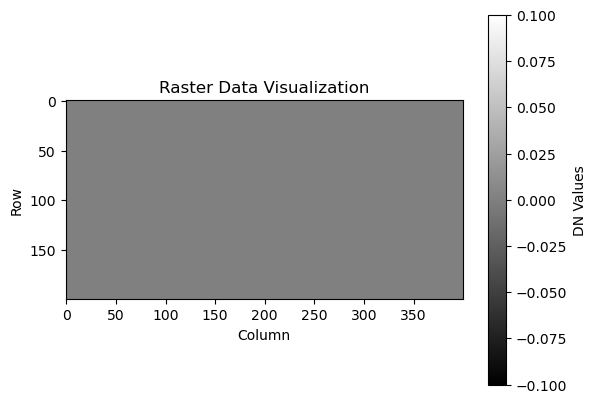

In [100]:
display_image(dataset)

In [19]:
coastal = pd.read_parquet('../../data/PR100/Boundaries/coastal_zone_mgmt_act_boundary.parquet')

In [ ]:
air

In [39]:
hazards = pd.read_parquet('../../data/PR100/Hazards/danger_zones_and_restricted_areas.parquet')

In [63]:
protected_areas = pd.read_parquet('../../data/PR100/Habitat/areas_protegidas_agencia.parquet')

In [95]:
airport_setbacks = pd.read_parquet('../../data/PR100/Infrastructure/setbacks_airport.parquet')

In [10]:
cyclone = pd.read_parquet('../../data/PR100/Hazards/tropical_cyclone_wind_exposure.parquet')

In [13]:
cyclone.columns

Index(['gridID', 'protractionNumber', 'leaseBlock', 'occurrence34kt',
       'occurrence50kt', 'occurrence64kt', 'intersectingStormTracks',
       'occurrence64ktMajorHurricanes', 'returnInterval34kt',
       'returnInterval50kt', 'returnInterval64kt', 'Shape_Length',
       'Shape_Area', 'grid_id', 'geometry'],
      dtype='object')

<Axes: >

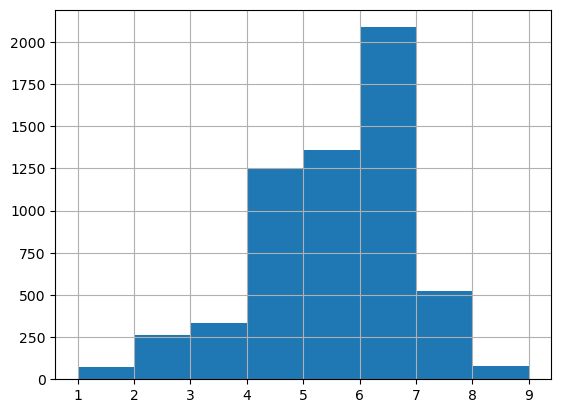

In [19]:
cyclone.occurrence64ktMajorHurricanes.hist(bins=8)

In [26]:
def convert_3D_2D(geometry):
    if geometry.is_empty:
        return geometry
    if isinstance(geometry, Polygon):
        exterior = [xy[:2] for xy in geometry.exterior.coords]
        interiors = [[xy[:2] for xy in interior.coords] for interior in geometry.interiors]
        return Polygon(exterior, interiors)
    elif isinstance(geometry, MultiPolygon):
        polygons = []
        for poly in geometry.geoms:
            polygons.append(convert_3D_2D(poly))
        return MultiPolygon(polygons)
    else:
        raise TypeError(f"Unhandled geometry type: {type(geometry)}")

In [97]:
# Assuming 'coastal' is your DataFrame and 'geometry' is the column with geometries
coastal['geometry_2d'] = coastal['geometry'].apply(lambda x: convert_3D_2D(loads(x)))
hazards['geometry_2d'] = hazards['geometry'].apply(lambda x: convert_3D_2D(loads(x)))
protected_areas['geometry_2d'] = protected_areas['geometry'].apply(lambda x: convert_3D_2D(loads(x)))
#airport_setbacks['geometry_2d'] = airport_setbacks['geometry'].apply(lambda x: convert_3D_2D(loads(x)))

In [102]:
# Now create a GeoDataFrame
coastal_gdf = gpd.GeoDataFrame(coastal, geometry='geometry_2d')
hazards_gdf = gpd.GeoDataFrame(hazards, geometry='geometry_2d')
protected_areas_gdf = gpd.GeoDataFrame(protected_areas, geometry='geometry_2d')

In [106]:
building_setbacks = pd.read_parquet('../../data/PR100/Infrastructure/setbacks_buildings.parquet')

In [103]:
from shapely import wkt

# Convert WKT strings to Shapely geometry objects
airport_setbacks['geometry'] = airport_setbacks['geometry'].apply(wkt.loads)

# Create GeoDataFrame
airport_setbacks_gdf = gpd.GeoDataFrame(airport_setbacks, geometry='geometry')

In [107]:
# Convert WKT strings to Shapely geometry objects
building_setbacks['geometry'] = building_setbacks['geometry'].apply(wkt.loads)

# Create GeoDataFrame
building_setbacks_gdf = gpd.GeoDataFrame(building_setbacks, geometry='geometry')

In [110]:
def find_parquet_files(directory):
    """
    Find all Parquet files within a directory and its subdirectories.

    :param directory: The base directory to search.
    :return: A list of paths to Parquet files.
    """
    parquet_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.parquet'):
                parquet_files.append(os.path.join(root, file))
    return parquet_files

In [151]:
def get_gdf(parquet_file):
    df = pd.read_parquet(parquet_file)
    df['geometry'] = df['geometry'].apply(wkt.loads)
    gdf = gpd.GeoDataFrame(df, geometry='geometry')
    return gdf

In [122]:
parquet_files = find_parquet_files('../../data')

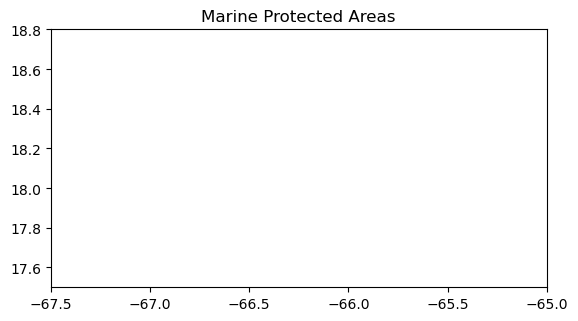

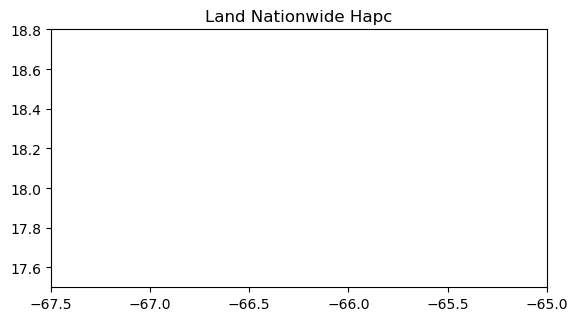

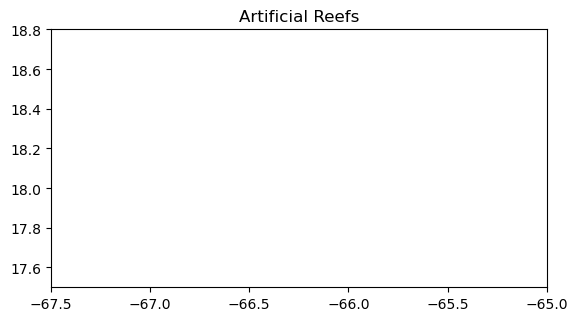

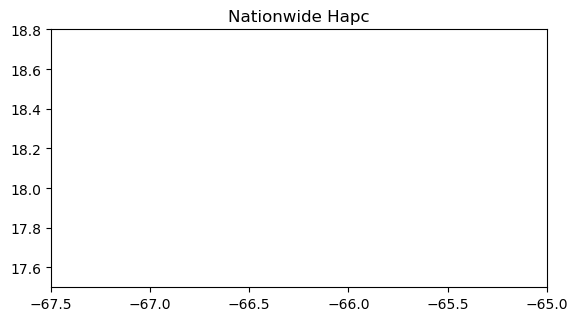

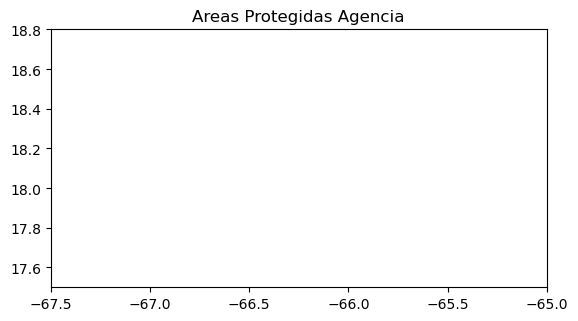

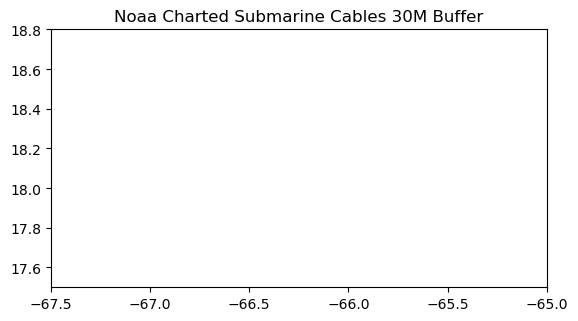

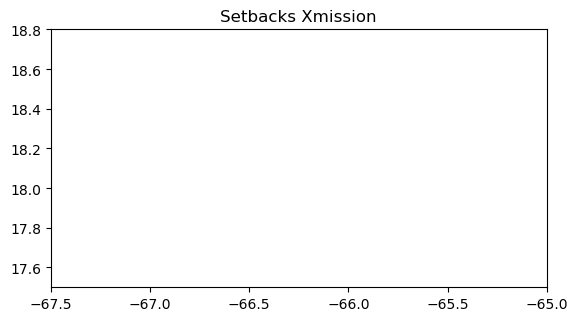

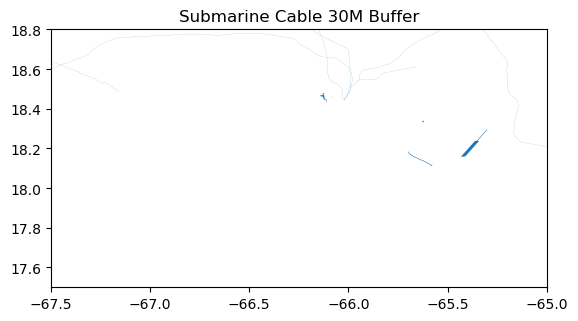

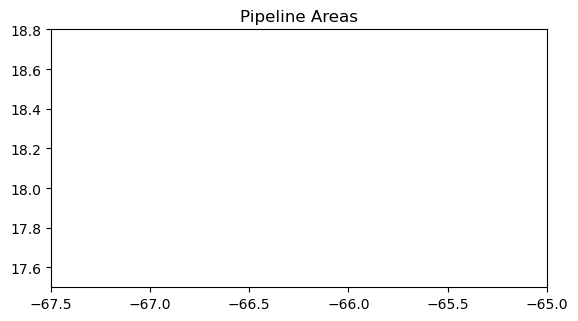

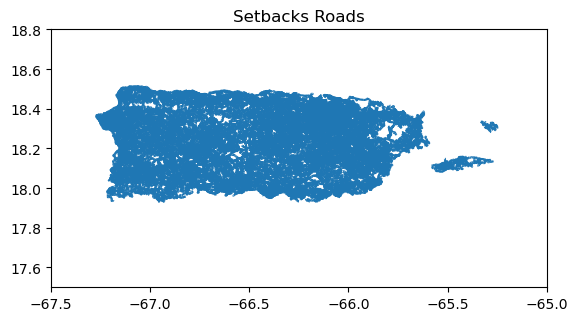

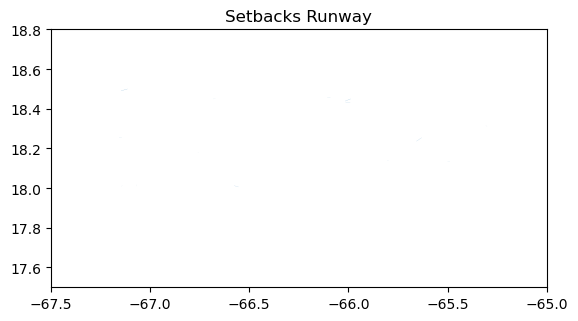

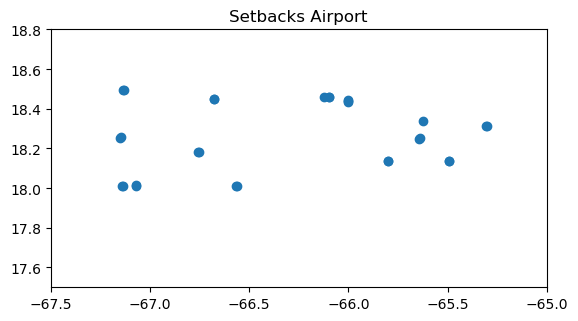

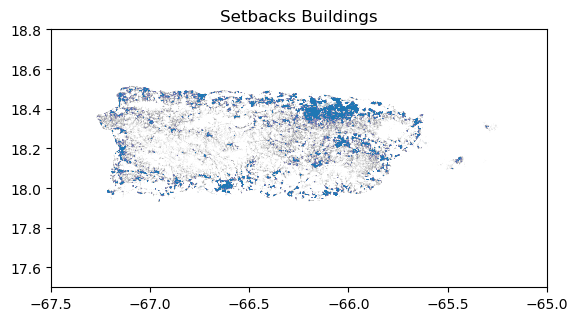

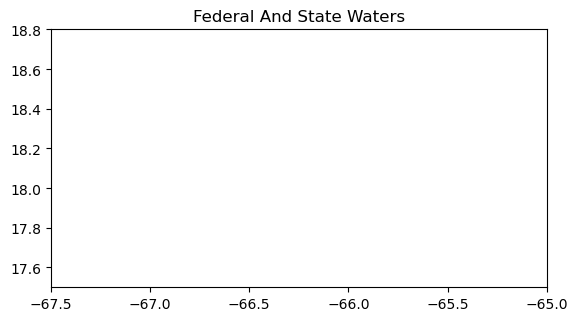

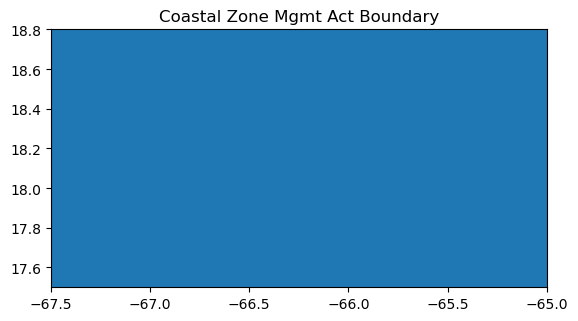

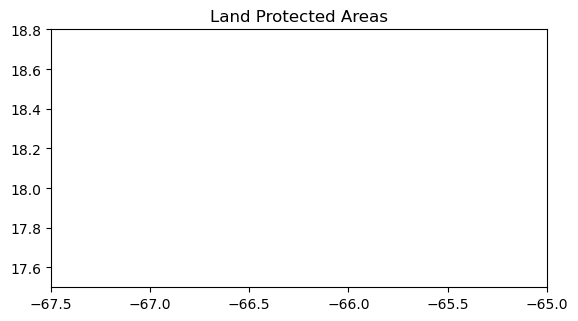

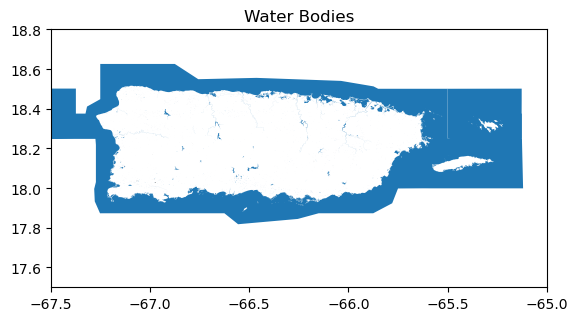

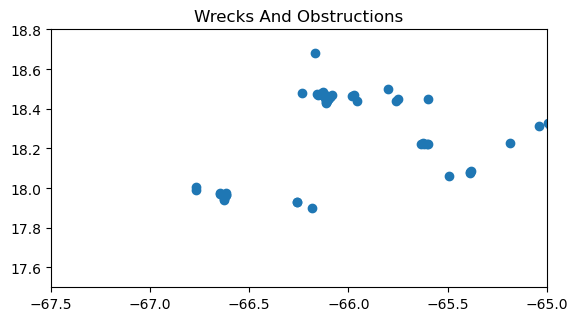

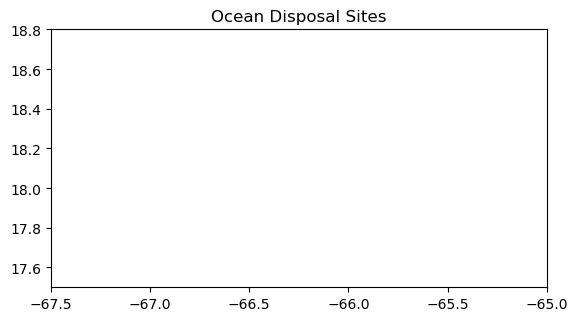

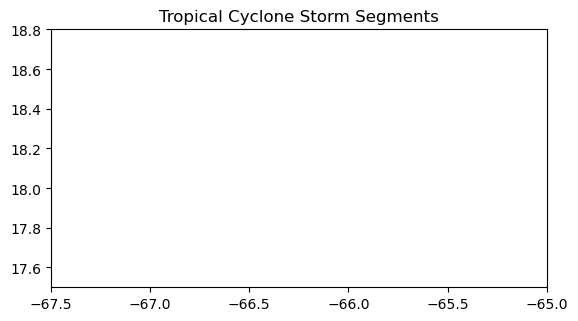

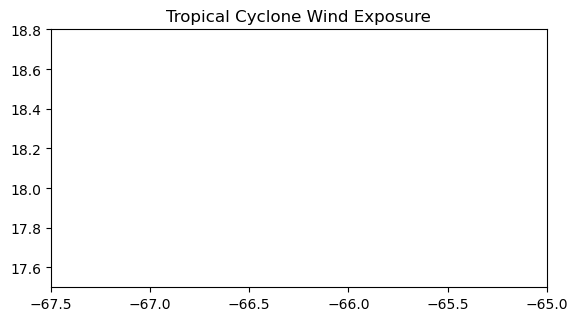

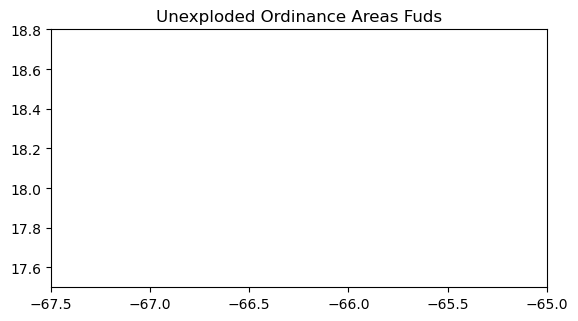

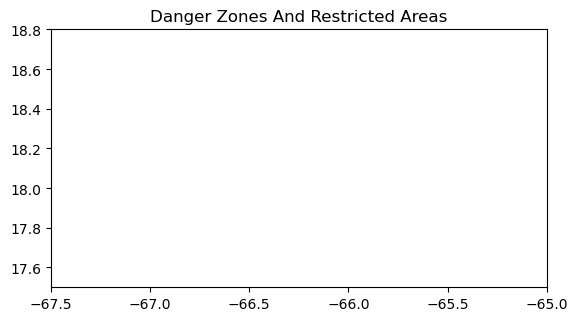

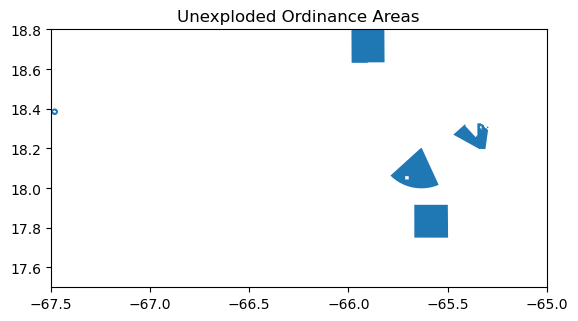

In [340]:
for pf in parquet_files:
    gdf = get_gdf(pf)
    gdf.plot()
    plt.title(pf.split('/')[-1].split('.')[0].replace('_',' ').title())
    plt.xlim([-67.5, -65])
    plt.ylim([17.5,18.8])
    plt.show()

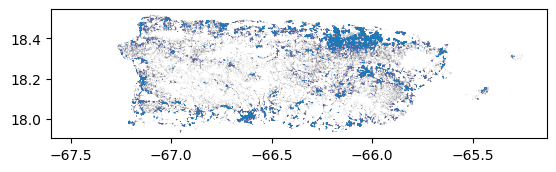

In [108]:
building_setbacks_gdf.plot()
plt.show()

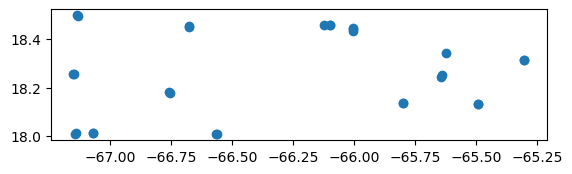

In [104]:
airport_setbacks_gdf.plot()
plt.show()

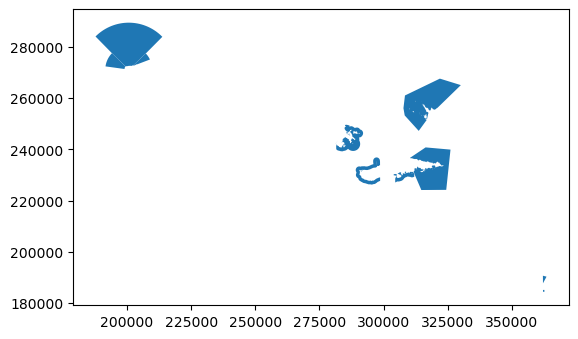

In [105]:
hazards_gdf.plot()
plt.show()

In [50]:
def create_grid(x_start, x_end, y_start, y_end, square_size):
    grid = []
    for x in np.arange(x_start, x_end, square_size):
        for y in np.arange(y_start, y_end, square_size):
            # Define the square's coordinates
            square = Polygon([(x, y), (x + square_size, y), (x + square_size, y + square_size), (x, y + square_size)])
            grid.append(square)
    return gpd.GeoDataFrame({'geometry': grid}, crs="EPSG:32161")

# Create the grid
grid_gdf = create_grid(100000, 300000, 200000, 300000, 500)

In [67]:
def rasterize_polygons(grid, polygons):
    centroids = grid.geometry.centroid
    grid['in_polygon'] = centroids.apply(lambda x: polygons.contains(x).any())

In [68]:
# def rasterize_polygons(grid, polygons):
#     grid['in_polygon'] = grid.geometry.apply(lambda x: polygons.contains(x).any())

In [69]:
rasterize_polygons(grid_gdf, coastal_gdf)

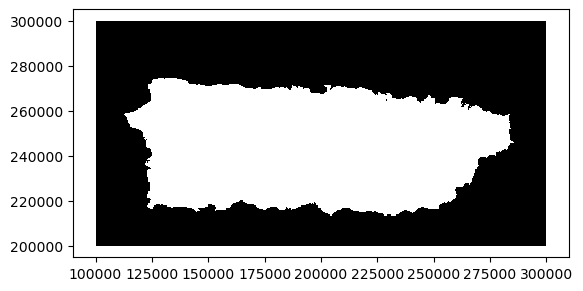

In [70]:
grid_gdf.plot(column='in_polygon', cmap='binary')
plt.show()

In [71]:
rasterize_polygons(grid_gdf, hazards_gdf)

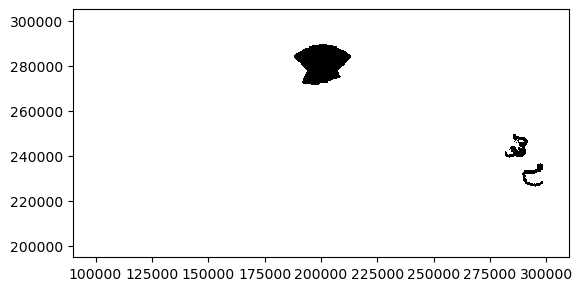

In [72]:
grid_gdf.plot(column='in_polygon', cmap='binary')
plt.show()

In [73]:
rasterize_polygons(grid_gdf, protected_areas_gdf)

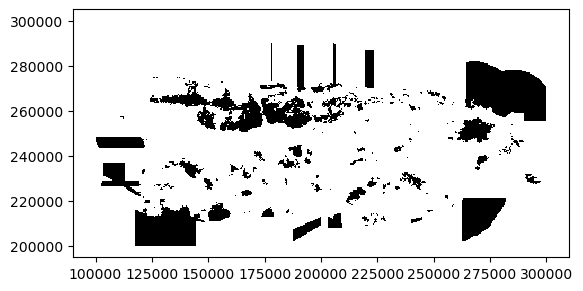

In [74]:
grid_gdf.plot(column='in_polygon', cmap='binary')
plt.show()

# Add binary masks for all PR100 files

In [308]:
grid_gdf = create_grid(100000, 300000, 200000, 300000, 500)

In [309]:
def process_parquet(file_path, grid, base_path):
    # Load the parquet file
    df = pd.read_parquet(file_path)
    
    # Convert geometry data from WKT to shapely objects
    df['geometry'] = df['geometry'].apply(wkt.loads)
    
    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:32161")

    # Rasterize
    rasterize_polygons(grid, gdf)

    # Create an identifier from the file path
    file_identifier = os.path.relpath(file_path, base_path).replace(os.sep, "_")

    # Add the results to the grid
    grid[file_identifier] = grid['in_polygon']
    del grid['in_polygon']

In [310]:
def process_all_parquets(directory, grid):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.parquet'):
                print(f'Processing file: {file}')
                file_path = os.path.join(root, file)
                process_parquet(file_path, grid, directory)

In [311]:
base_directory = '../../data/'
process_all_parquets(base_directory, grid_gdf)

Processing file: marine_protected_areas.parquet
Processing file: land_nationwide_hapc.parquet
Processing file: artificial_reefs.parquet
Processing file: nationwide_hapc.parquet
Processing file: areas_protegidas_agencia.parquet
Processing file: noaa_charted_submarine_cables_30m_buffer.parquet
Processing file: setbacks_xmission.parquet
Processing file: submarine_cable_30m_buffer.parquet
Processing file: pipeline_areas.parquet
Processing file: setbacks_roads.parquet
Processing file: setbacks_runway.parquet
Processing file: setbacks_airport.parquet
Processing file: setbacks_buildings.parquet
Processing file: federal_and_state_waters.parquet
Processing file: coastal_zone_mgmt_act_boundary.parquet
Processing file: land_protected_areas.parquet
Processing file: water_bodies.parquet
Processing file: wrecks_and_obstructions.parquet
Processing file: ocean_disposal_sites.parquet
Processing file: tropical_cyclone_storm_segments.parquet
Processing file: tropical_cyclone_wind_exposure.parquet
Process

In [84]:
grid_gdf.to_csv('grid_results_11_30.csv')

In [312]:
# grid_gdf.to_parquet('grid_results_11_30.parquet')

In [313]:
grid_gdf.T

,0,1,2,3,4,5,6,7,8,9,...,79990,79991,79992,79993,79994,79995,79996,79997,79998,79999
geometry,"POLYGON ((100000 200000, 100500 200000, 100500...","POLYGON ((100000 200500, 100500 200500, 100500...","POLYGON ((100000 201000, 100500 201000, 100500...","POLYGON ((100000 201500, 100500 201500, 100500...","POLYGON ((100000 202000, 100500 202000, 100500...","POLYGON ((100000 202500, 100500 202500, 100500...","POLYGON ((100000 203000, 100500 203000, 100500...","POLYGON ((100000 203500, 100500 203500, 100500...","POLYGON ((100000 204000, 100500 204000, 100500...","POLYGON ((100000 204500, 100500 204500, 100500...",...,"POLYGON ((299500 295000, 300000 295000, 300000...","POLYGON ((299500 295500, 300000 295500, 300000...","POLYGON ((299500 296000, 300000 296000, 300000...","POLYGON ((299500 296500, 300000 296500, 300000...","POLYGON ((299500 297000, 300000 297000, 300000...","POLYGON ((299500 297500, 300000 297500, 300000...","POLYGON ((299500 298000, 300000 298000, 300000...","POLYGON ((299500 298500, 300000 298500, 300000...","POLYGON ((299500 299000, 300000 299000, 300000...","POLYGON ((299500 299500, 300000 299500, 300000..."
PR100_Habitat_marine_protected_areas.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Habitat_land_nationwide_hapc.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Habitat_artificial_reefs.parquet,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
PR100_Habitat_nationwide_hapc.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Habitat_areas_protegidas_agencia.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Infrastructure_noaa_charted_submarine_cables_30m_buffer.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Infrastructure_setbacks_xmission.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Infrastructure_submarine_cable_30m_buffer.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PR100_Infrastructure_pipeline_areas.parquet,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
grid_gdf['aggregate'] = grid_gdf.iloc[:, 1:].any(axis=1)

In [101]:
grid_gdf['aggregate']

0        True
1        True
2        True
3        True
4        True
         ... 
79995    True
79996    True
79997    True
79998    True
79999    True
Name: aggregate, Length: 80000, dtype: bool

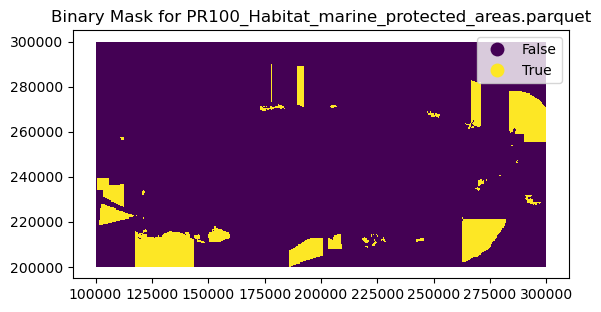

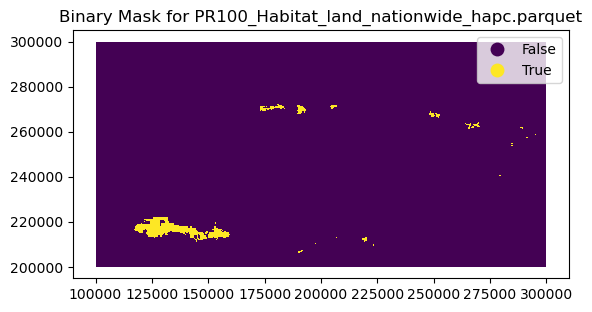

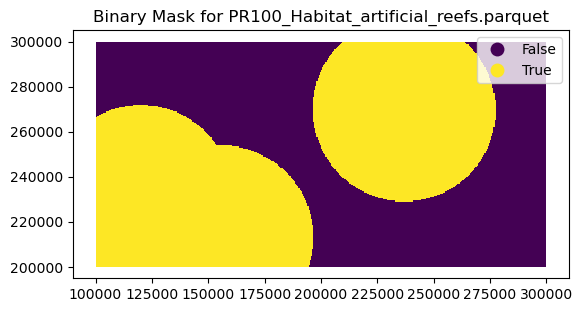

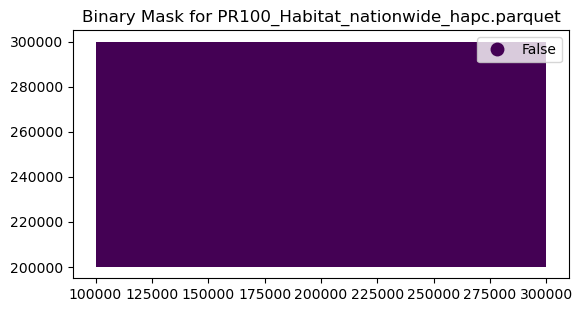

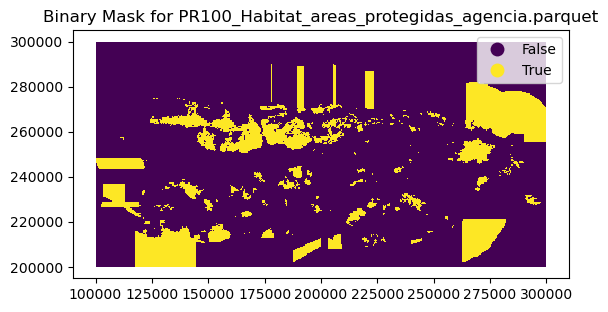

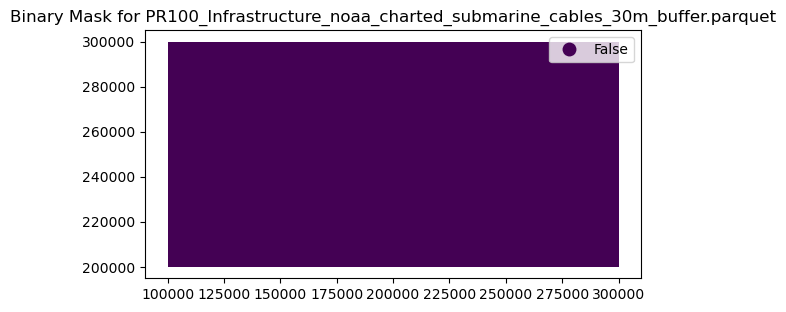

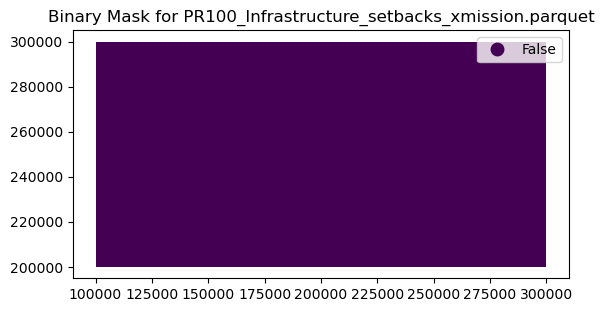

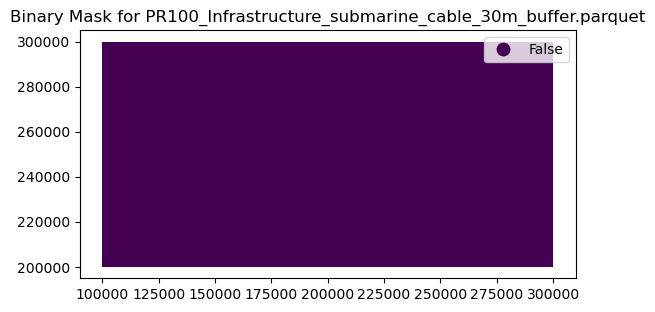

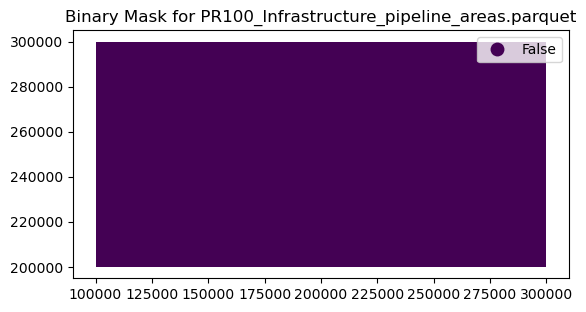

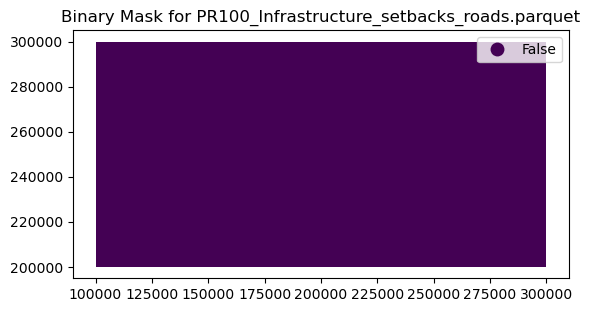

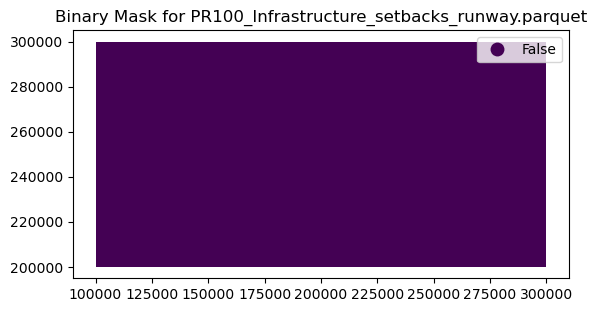

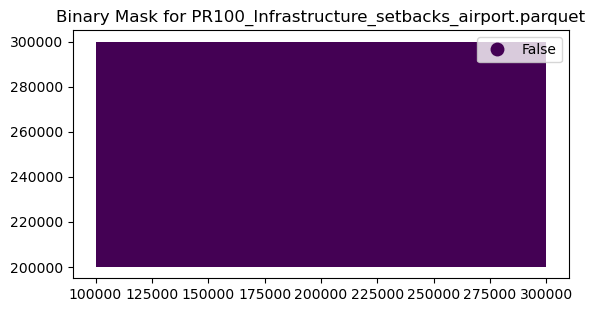

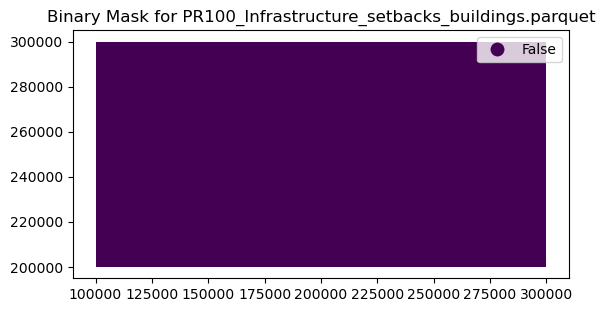

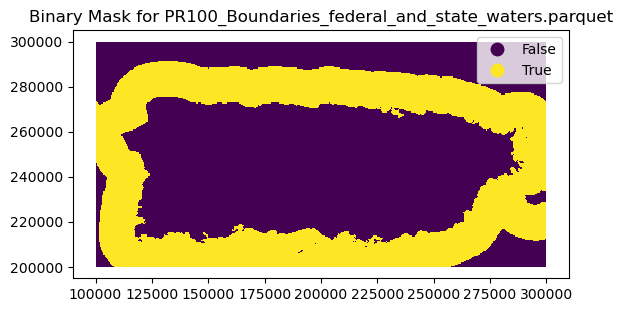

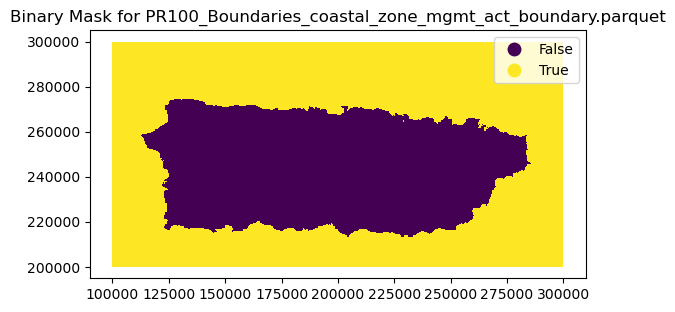

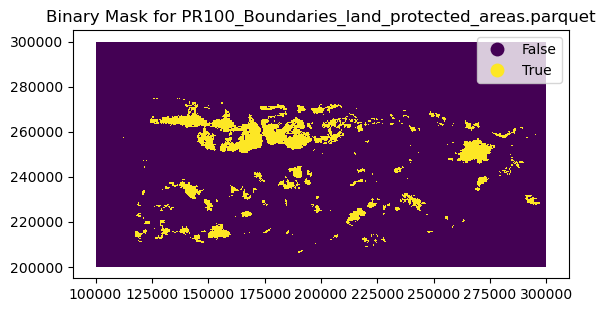

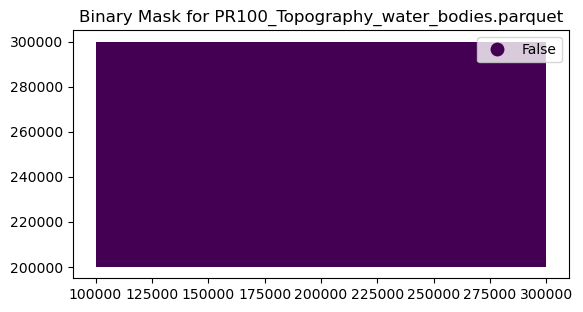

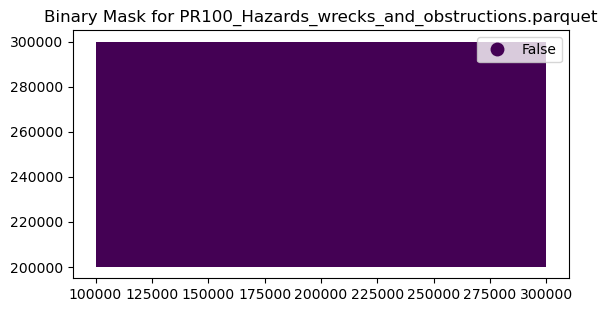

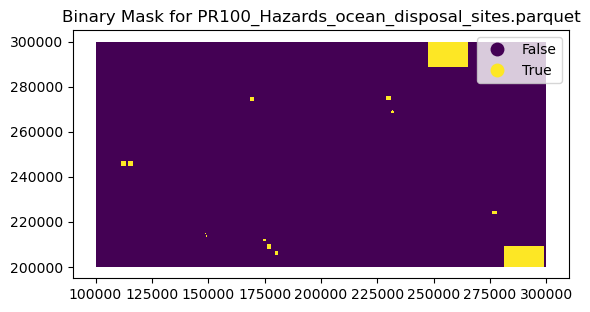

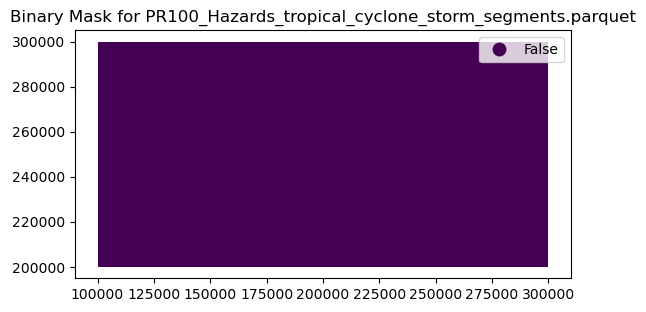

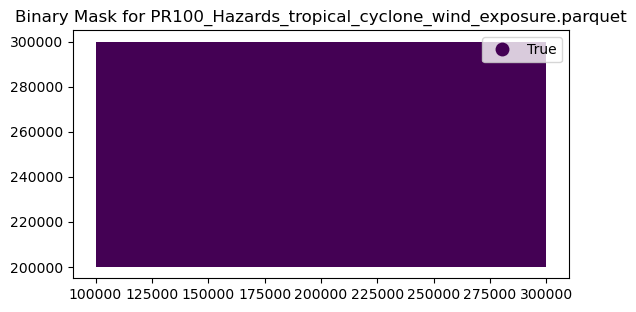

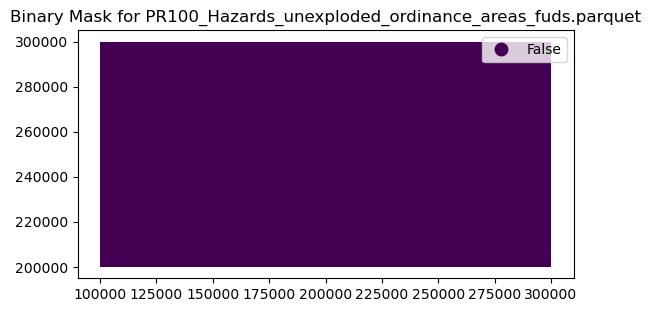

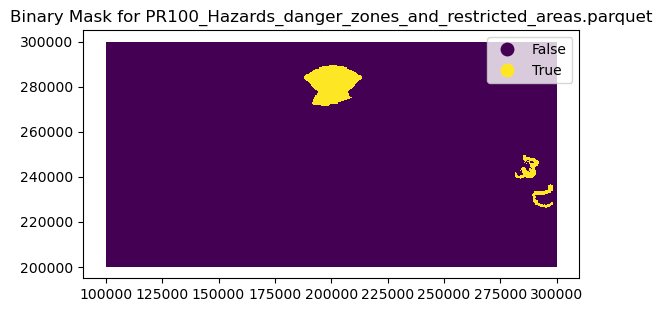

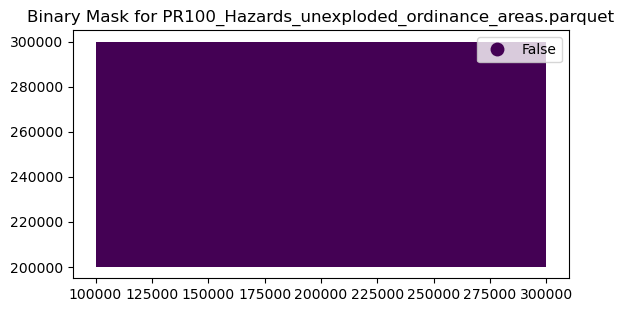

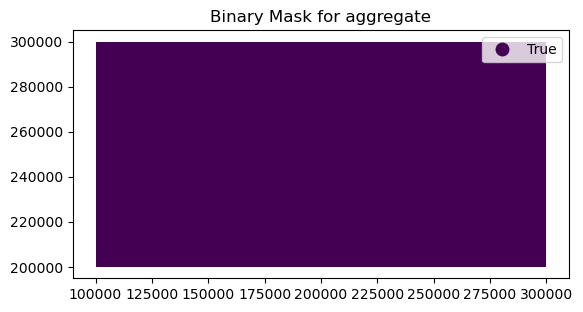

In [93]:
for column in grid_gdf.columns:
    if column == 'geometry':
        continue
    fig, ax = plt.subplots(1, 1)
    grid_gdf.plot(column=column, ax=ax, legend=True, cmap='viridis')
    plt.title(f'Binary Mask for {column}')
    plt.show()

In [420]:
buildings = ('../../data/PR100/Infrastructure/setbacks_buildings.parquet', 'EPSG:4326')
xmission = ('../../data/PR100/Infrastructure/setbacks_xmission.parquet', grid_gdf.crs)

In [422]:
building_count = get_count_in_grid_cell(buildings[0], buildings[1], grid_gdf)

/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


KeyError: 'index'

In [293]:
building_count

index
0        1
1        1
2        1
3        1
4        1
        ..
79995    1
79996    1
79997    1
79998    1
79999    1
Length: 80000, dtype: int64

In [294]:
grid_gdf['building_density'] = building_count.reindex(grid_gdf.index, fill_value=0)

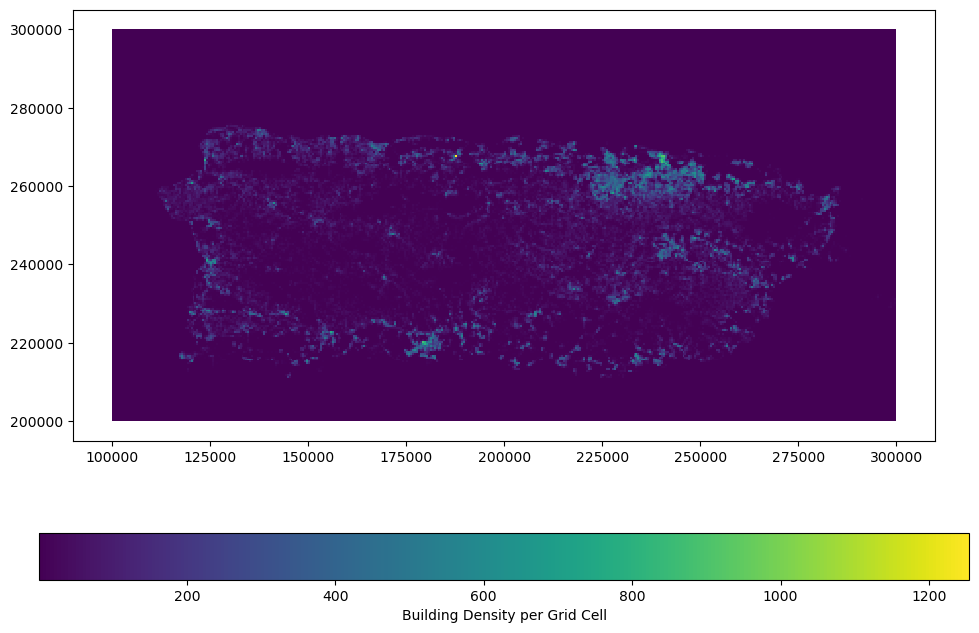

In [295]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
grid_gdf.plot(column='building_density', ax=ax, legend=True,
              legend_kwds={'label': "Building Density per Grid Cell",
                           'orientation': "horizontal"})
plt.show()

/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


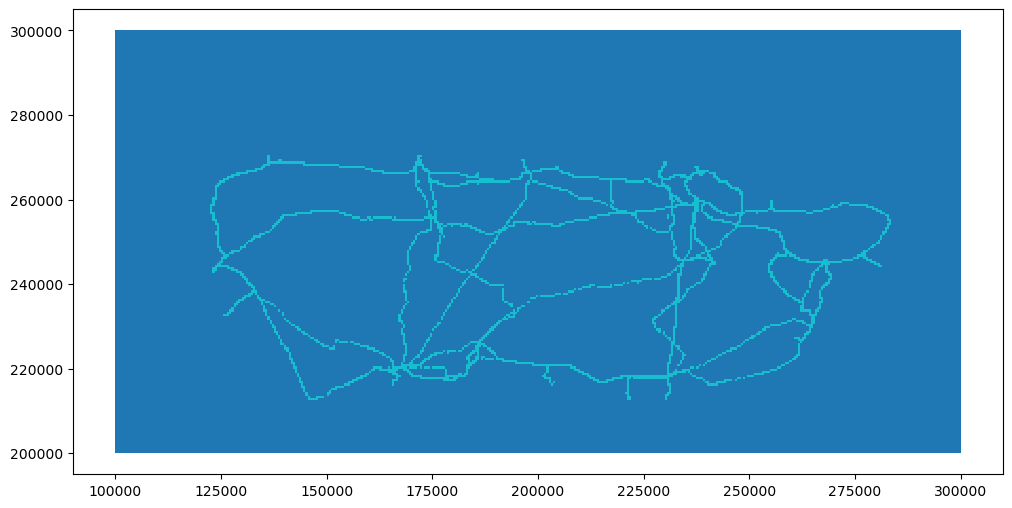

In [332]:
xmission_count = get_count_in_grid_cell(xmission[0], xmission[1])
grid_gdf['intersects_transmission_line'] = xmission_count > 1
grid_gdf['intersects_transmission_line'].fillna(False, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
grid_gdf.plot(column='intersects_transmission_line', ax=ax)
plt.show()

In [190]:
filepaths = find_parquet_files('../../data')

In [191]:
filepaths

['../../data/PR100/Habitat/marine_protected_areas.parquet',
 '../../data/PR100/Habitat/land_nationwide_hapc.parquet',
 '../../data/PR100/Habitat/artificial_reefs.parquet',
 '../../data/PR100/Habitat/nationwide_hapc.parquet',
 '../../data/PR100/Habitat/areas_protegidas_agencia.parquet',
 '../../data/PR100/Infrastructure/noaa_charted_submarine_cables_30m_buffer.parquet',
 '../../data/PR100/Infrastructure/setbacks_xmission.parquet',
 '../../data/PR100/Infrastructure/submarine_cable_30m_buffer.parquet',
 '../../data/PR100/Infrastructure/pipeline_areas.parquet',
 '../../data/PR100/Infrastructure/setbacks_roads.parquet',
 '../../data/PR100/Infrastructure/setbacks_runway.parquet',
 '../../data/PR100/Infrastructure/setbacks_airport.parquet',
 '../../data/PR100/Infrastructure/setbacks_buildings.parquet',
 '../../data/PR100/Boundaries/federal_and_state_waters.parquet',
 '../../data/PR100/Boundaries/coastal_zone_mgmt_act_boundary.parquet',
 '../../data/PR100/Boundaries/land_protected_areas.parque

In [209]:
crs = []
for fp in filepaths:
    print(fp)
    crs.append(input('CRS'

../../data/PR100/Habitat/marine_protected_areas.parquet


CRS:  0


../../data/PR100/Habitat/land_nationwide_hapc.parquet


CRS:  0


../../data/PR100/Habitat/artificial_reefs.parquet


CRS:  0


../../data/PR100/Habitat/nationwide_hapc.parquet


CRS:  0


../../data/PR100/Habitat/areas_protegidas_agencia.parquet


CRS:  0


../../data/PR100/Infrastructure/noaa_charted_submarine_cables_30m_buffer.parquet


CRS:  0


../../data/PR100/Infrastructure/setbacks_xmission.parquet


CRS:  0


../../data/PR100/Infrastructure/submarine_cable_30m_buffer.parquet


CRS:  0


../../data/PR100/Infrastructure/pipeline_areas.parquet


CRS:  0


../../data/PR100/Infrastructure/setbacks_roads.parquet


CRS:  0


../../data/PR100/Infrastructure/setbacks_runway.parquet


CRS:  0


../../data/PR100/Infrastructure/setbacks_airport.parquet


CRS:  0


../../data/PR100/Infrastructure/setbacks_buildings.parquet


CRS:  0


../../data/PR100/Boundaries/federal_and_state_waters.parquet


CRS:  0


../../data/PR100/Boundaries/coastal_zone_mgmt_act_boundary.parquet


CRS:  0


../../data/PR100/Boundaries/land_protected_areas.parquet


CRS:  0


../../data/PR100/Topography/water_bodies.parquet


CRS:  0


../../data/PR100/Hazards/wrecks_and_obstructions.parquet


CRS:  0


../../data/PR100/Hazards/ocean_disposal_sites.parquet


CRS:  0


../../data/PR100/Hazards/tropical_cyclone_storm_segments.parquet


CRS:  0


../../data/PR100/Hazards/tropical_cyclone_wind_exposure.parquet


CRS:  0


../../data/PR100/Hazards/unexploded_ordinance_areas_fuds.parquet


CRS:  0


../../data/PR100/Hazards/danger_zones_and_restricted_areas.parquet


CRS:  0


../../data/PR100/Hazards/unexploded_ordinance_areas.parquet


CRS:  0


In [213]:
for i, c in enumerate(crs):
    if c == '0':
        crs[i] = 'EPSG:32161'

In [210]:
type = []
for fp in filepaths:
    print(fp)
    type.append(input('Type: '))

../../data/PR100/Habitat/marine_protected_areas.parquet


Type:  0


../../data/PR100/Habitat/land_nationwide_hapc.parquet


Type:  0


../../data/PR100/Habitat/artificial_reefs.parquet


Type:  0


../../data/PR100/Habitat/nationwide_hapc.parquet


Type:  0


../../data/PR100/Habitat/areas_protegidas_agencia.parquet


Type:  0


../../data/PR100/Infrastructure/noaa_charted_submarine_cables_30m_buffer.parquet


Type:  0


../../data/PR100/Infrastructure/setbacks_xmission.parquet


Type:  0


../../data/PR100/Infrastructure/submarine_cable_30m_buffer.parquet


Type:  0


../../data/PR100/Infrastructure/pipeline_areas.parquet


Type:  0


../../data/PR100/Infrastructure/setbacks_roads.parquet


Type:  1


../../data/PR100/Infrastructure/setbacks_runway.parquet


Type:  0


../../data/PR100/Infrastructure/setbacks_airport.parquet


Type:  0


../../data/PR100/Infrastructure/setbacks_buildings.parquet


Type:  1


../../data/PR100/Boundaries/federal_and_state_waters.parquet


Type:  0


../../data/PR100/Boundaries/coastal_zone_mgmt_act_boundary.parquet


Type:  0


../../data/PR100/Boundaries/land_protected_areas.parquet


Type:  0


../../data/PR100/Topography/water_bodies.parquet


Type:  0


../../data/PR100/Hazards/wrecks_and_obstructions.parquet


Type:  0


../../data/PR100/Hazards/ocean_disposal_sites.parquet


Type:  0


../../data/PR100/Hazards/tropical_cyclone_storm_segments.parquet


Type:  0


../../data/PR100/Hazards/tropical_cyclone_wind_exposure.parquet


Type:  0


../../data/PR100/Hazards/unexploded_ordinance_areas_fuds.parquet


Type:  0


../../data/PR100/Hazards/danger_zones_and_restricted_areas.parquet


Type:  0


../../data/PR100/Hazards/unexploded_ordinance_areas.parquet


Type:  0


In [215]:
for i, t in enumerate(type):
    if t == '0':
        type[i] = 'intersection'
    else:
        type[i] = 'density'

In [242]:
files = {key: (crs, type) for key, crs, type in zip(filepaths, crs, type)}

In [243]:
for f, v in files.items():
    if v[0] != 'EPSG:32161':
        files[f] = ('EPSG:4326', v[1])

In [244]:
files

{'../../data/PR100/Habitat/marine_protected_areas.parquet': ('EPSG:32161',
  'intersection'),
 '../../data/PR100/Habitat/land_nationwide_hapc.parquet': ('EPSG:32161',
  'intersection'),
 '../../data/PR100/Habitat/artificial_reefs.parquet': ('EPSG:32161',
  'intersection'),
 '../../data/PR100/Habitat/nationwide_hapc.parquet': ('EPSG:32161',
  'intersection'),
 '../../data/PR100/Habitat/areas_protegidas_agencia.parquet': ('EPSG:32161',
  'intersection'),
 '../../data/PR100/Infrastructure/noaa_charted_submarine_cables_30m_buffer.parquet': ('EPSG:32161',
  'intersection'),
 '../../data/PR100/Infrastructure/setbacks_xmission.parquet': ('EPSG:32161',
  'intersection'),
 '../../data/PR100/Infrastructure/submarine_cable_30m_buffer.parquet': ('EPSG:32161',
  'intersection'),
 '../../data/PR100/Infrastructure/pipeline_areas.parquet': ('EPSG:32161',
  'intersection'),
 '../../data/PR100/Infrastructure/setbacks_roads.parquet': ('EPSG:4326',
  'density'),
 '../../data/PR100/Infrastructure/setbacks_

In [245]:
columns = dict()
for f, val in files.items():
    name = f.split('/')[-1].split('.')[0]
    columns[name] = (f, val[0], val[1])

In [256]:
columns

{'marine_protected_areas': ('../../data/PR100/Habitat/marine_protected_areas.parquet',
  'EPSG:32161',
  'intersection'),
 'land_nationwide_hapc': ('../../data/PR100/Habitat/land_nationwide_hapc.parquet',
  'EPSG:32161',
  'intersection'),
 'artificial_reefs': ('../../data/PR100/Habitat/artificial_reefs.parquet',
  'EPSG:32161',
  'intersection'),
 'nationwide_hapc': ('../../data/PR100/Habitat/nationwide_hapc.parquet',
  'EPSG:32161',
  'intersection'),
 'areas_protegidas_agencia': ('../../data/PR100/Habitat/areas_protegidas_agencia.parquet',
  'EPSG:32161',
  'intersection'),
 'noaa_charted_submarine_cables_30m_buffer': ('../../data/PR100/Infrastructure/noaa_charted_submarine_cables_30m_buffer.parquet',
  'EPSG:32161',
  'intersection'),
 'setbacks_xmission': ('../../data/PR100/Infrastructure/setbacks_xmission.parquet',
  'EPSG:32161',
  'intersection'),
 'submarine_cable_30m_buffer': ('../../data/PR100/Infrastructure/submarine_cable_30m_buffer.parquet',
  'EPSG:32161',
  'intersectio

In [328]:
environment_gdf = create_grid(100000, 300000, 200000, 300000, 500)
environment_gdf.index.name = 'index'
environment_gdf['index_grid'] = environment_gdf.index

In [326]:
def get_overlay(filepath, crs, column):
    features_gdf = get_gdf(filepath)
    features_gdf.set_crs(crs, inplace=True)
    features_gdf = features_gdf.to_crs(environment_gdf.crs)

    # Perform the overlay and directly add a column to environment_gdf indicating if an intersection was found
    intersection_gdf = gpd.overlay(environment_gdf, features_gdf, how='intersection')
    environment_gdf[column] = environment_gdf.index.isin(intersection_gdf['index_grid'])

In [322]:
def get_overlay(filepath, crs, column):
    features_gdf = get_gdf(filepath)
    features_gdf.set_crs(crs, inplace=True)
    features_gdf = features_gdf.to_crs(environment_gdf.crs)
    intersection_gdf = gpd.overlay(environment_gdf, features_gdf, how='intersection')
    environment_gdf[column] = False
    intersection_gdf.index.name = 'index'
    filled_cells = intersection_gdf['index'].unique()
    environment_gdf.loc[environment_gdf.index.isin(filled_cells), column] = True

In [329]:
for col, values in columns.items():
    print(f'Processing {col}')
    get_overlay(values[0], values[1], col)
    display(environment_gdf[col].value_counts())  

Processing marine_protected_areas


marine_protected_areas
False    72705
True      7295
Name: count, dtype: int64

Processing land_nationwide_hapc


land_nationwide_hapc
False    78536
True      1464
Name: count, dtype: int64

Processing artificial_reefs


artificial_reefs
True     41982
False    38018
Name: count, dtype: int64

Processing nationwide_hapc


nationwide_hapc
False    80000
Name: count, dtype: int64

Processing areas_protegidas_agencia


areas_protegidas_agencia
False    63736
True     16264
Name: count, dtype: int64

Processing noaa_charted_submarine_cables_30m_buffer


/tmp/ipykernel_9496/37359775.py:7: UserWarning: `keep_geom_type=True` in overlay resulted in 2613 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection_gdf = gpd.overlay(environment_gdf, features_gdf, how='intersection')


noaa_charted_submarine_cables_30m_buffer
False    80000
Name: count, dtype: int64

Processing setbacks_xmission


/tmp/ipykernel_9496/37359775.py:7: UserWarning: `keep_geom_type=True` in overlay resulted in 13060 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection_gdf = gpd.overlay(environment_gdf, features_gdf, how='intersection')


setbacks_xmission
False    80000
Name: count, dtype: int64

Processing submarine_cable_30m_buffer


submarine_cable_30m_buffer
False    80000
Name: count, dtype: int64

Processing pipeline_areas


pipeline_areas
False    80000
Name: count, dtype: int64

Processing setbacks_roads


/tmp/ipykernel_9496/37359775.py:7: UserWarning: `keep_geom_type=True` in overlay resulted in 334289 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection_gdf = gpd.overlay(environment_gdf, features_gdf, how='intersection')


setbacks_roads
False    80000
Name: count, dtype: int64

Processing setbacks_runway


setbacks_runway
False    79922
True        78
Name: count, dtype: int64

Processing setbacks_airport


/tmp/ipykernel_9496/37359775.py:7: UserWarning: `keep_geom_type=True` in overlay resulted in 27 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection_gdf = gpd.overlay(environment_gdf, features_gdf, how='intersection')


setbacks_airport
False    80000
Name: count, dtype: int64

Processing setbacks_buildings


setbacks_buildings
False    53011
True     26989
Name: count, dtype: int64

Processing federal_and_state_waters


federal_and_state_waters
False    47645
True     32355
Name: count, dtype: int64

Processing coastal_zone_mgmt_act_boundary


coastal_zone_mgmt_act_boundary
True     49265
False    30735
Name: count, dtype: int64

Processing land_protected_areas


land_protected_areas
False    71312
True      8688
Name: count, dtype: int64

Processing water_bodies


water_bodies
False    52394
True     27606
Name: count, dtype: int64

Processing wrecks_and_obstructions


/tmp/ipykernel_9496/37359775.py:7: UserWarning: `keep_geom_type=True` in overlay resulted in 63 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection_gdf = gpd.overlay(environment_gdf, features_gdf, how='intersection')


wrecks_and_obstructions
False    80000
Name: count, dtype: int64

Processing ocean_disposal_sites


ocean_disposal_sites
False    78291
True      1709
Name: count, dtype: int64

Processing tropical_cyclone_storm_segments


/tmp/ipykernel_9496/37359775.py:7: UserWarning: `keep_geom_type=True` in overlay resulted in 7422 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection_gdf = gpd.overlay(environment_gdf, features_gdf, how='intersection')


tropical_cyclone_storm_segments
False    80000
Name: count, dtype: int64

Processing tropical_cyclone_wind_exposure


tropical_cyclone_wind_exposure
True    80000
Name: count, dtype: int64

Processing unexploded_ordinance_areas_fuds


unexploded_ordinance_areas_fuds
False    80000
Name: count, dtype: int64

Processing danger_zones_and_restricted_areas


danger_zones_and_restricted_areas
False    78198
True      1802
Name: count, dtype: int64

Processing unexploded_ordinance_areas


unexploded_ordinance_areas
False    77085
True      2915
Name: count, dtype: int64

marine_protected_areas
False    72705
True      7295
Name: count, dtype: int64

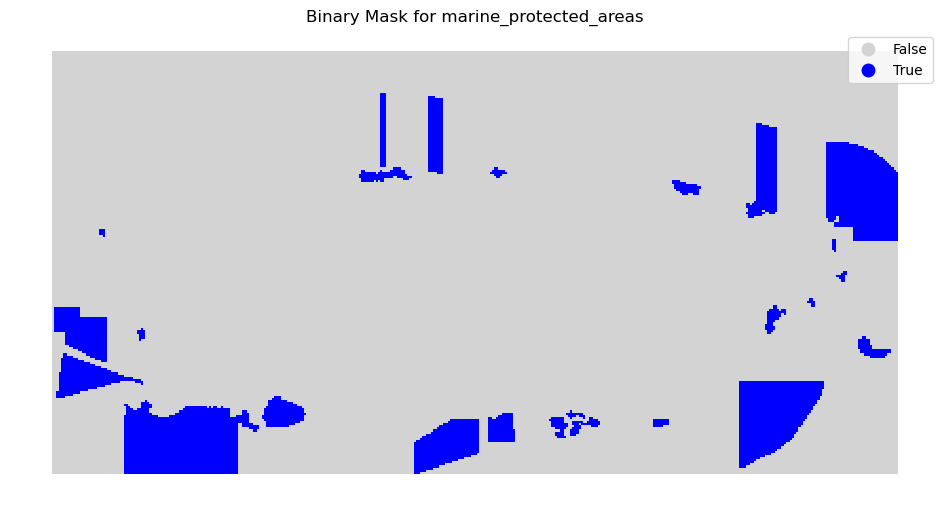

land_nationwide_hapc
False    78536
True      1464
Name: count, dtype: int64

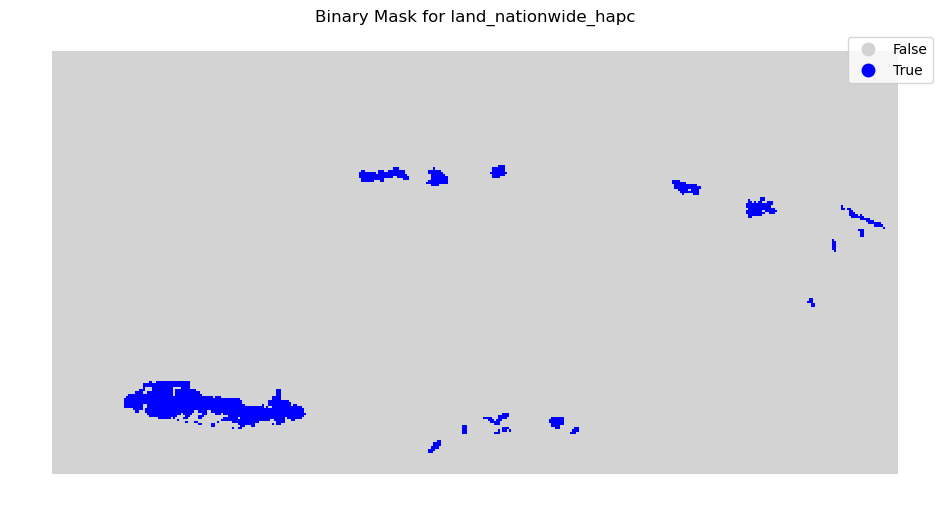

artificial_reefs
True     41982
False    38018
Name: count, dtype: int64

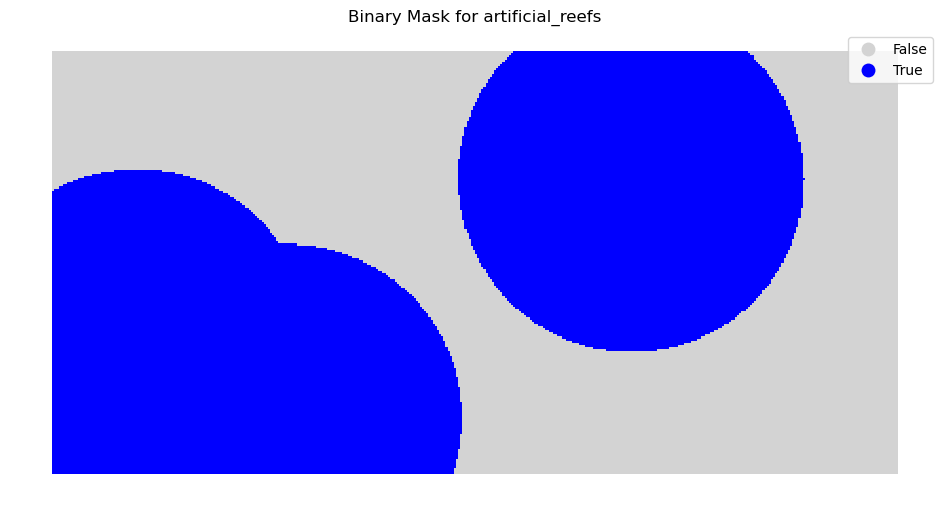

nationwide_hapc
False    80000
Name: count, dtype: int64

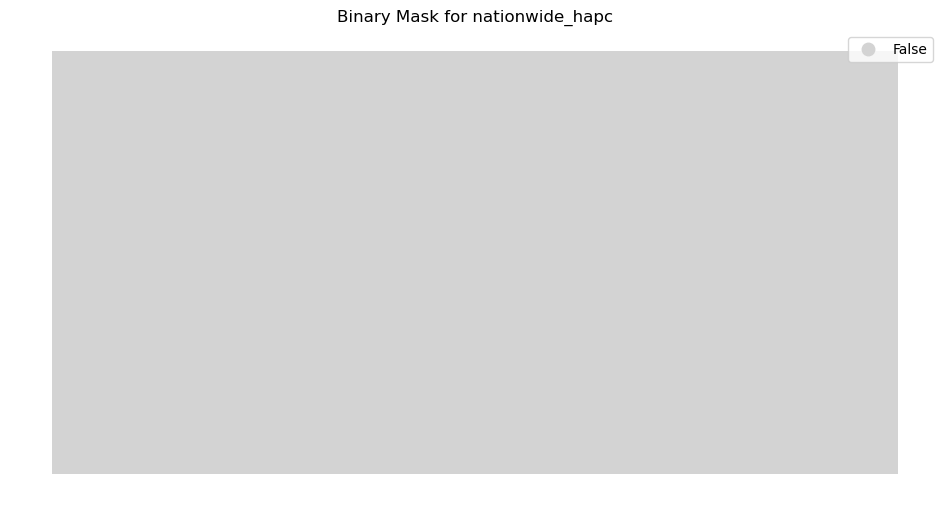

areas_protegidas_agencia
False    63736
True     16264
Name: count, dtype: int64

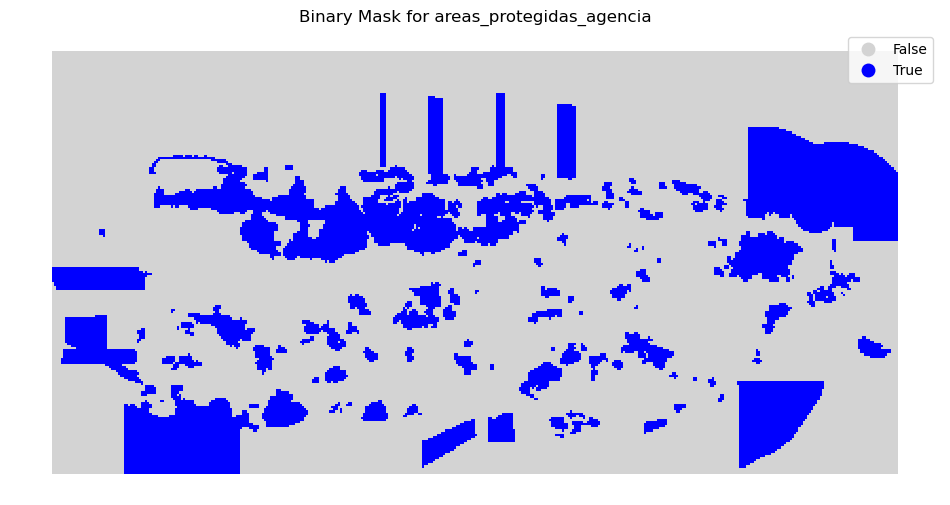

noaa_charted_submarine_cables_30m_buffer
False    80000
Name: count, dtype: int64

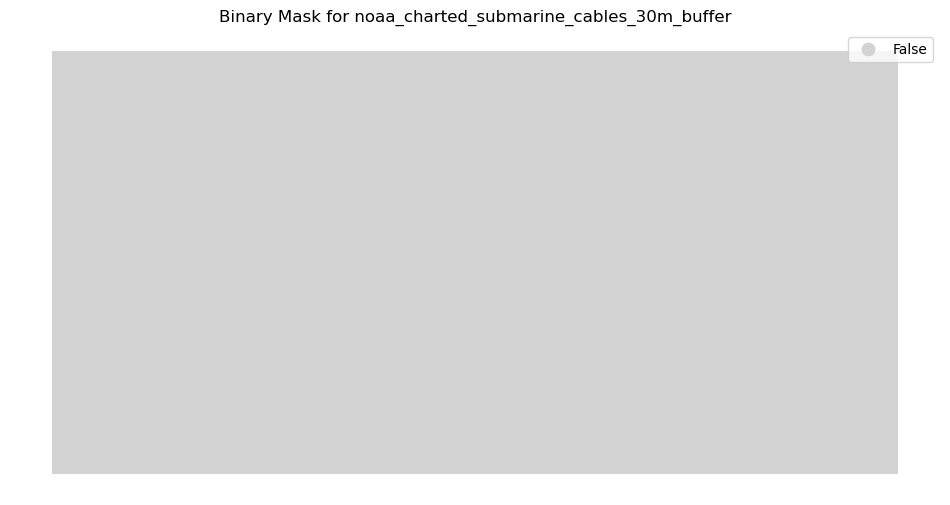

setbacks_xmission
False    80000
Name: count, dtype: int64

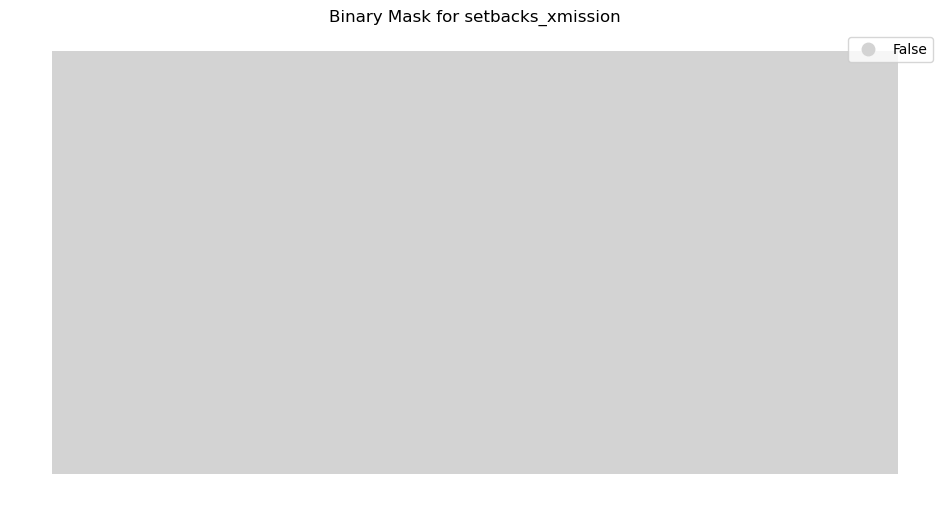

submarine_cable_30m_buffer
False    80000
Name: count, dtype: int64

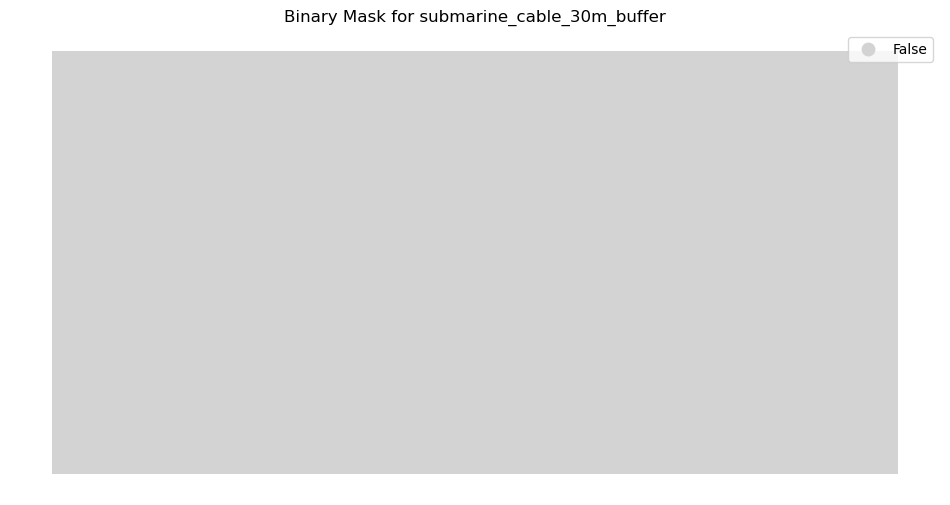

pipeline_areas
False    80000
Name: count, dtype: int64

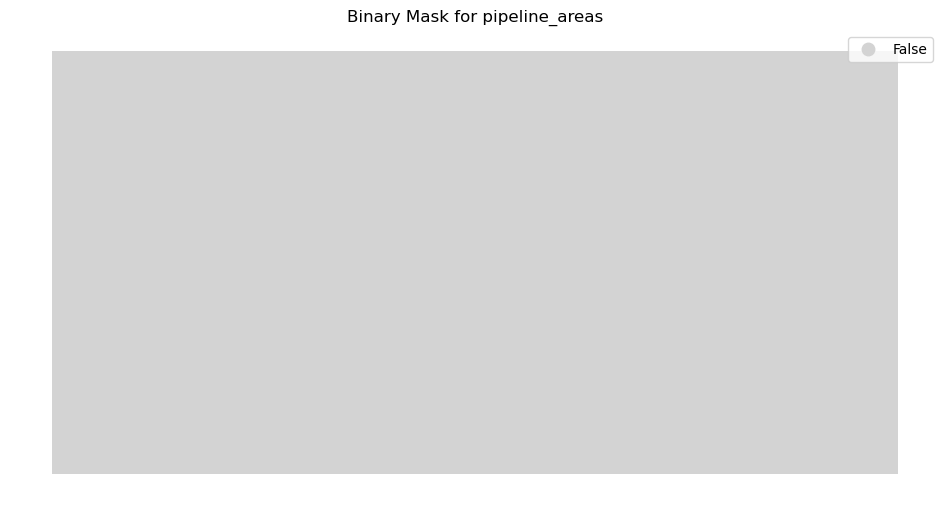

setbacks_roads
False    80000
Name: count, dtype: int64

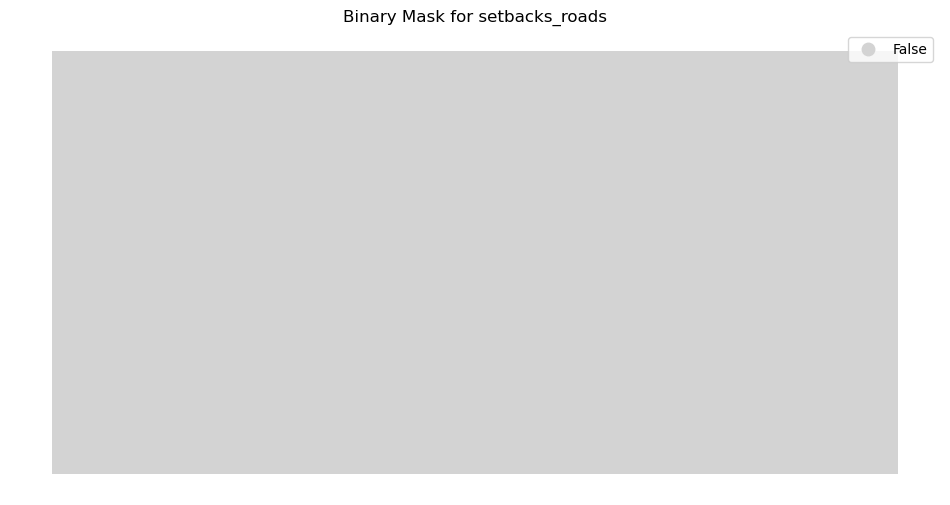

setbacks_runway
False    79922
True        78
Name: count, dtype: int64

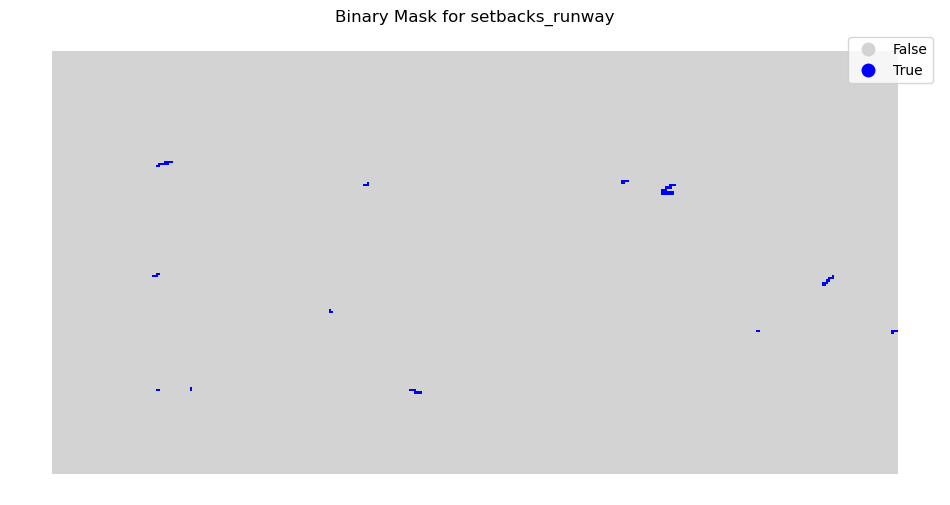

setbacks_airport
False    80000
Name: count, dtype: int64

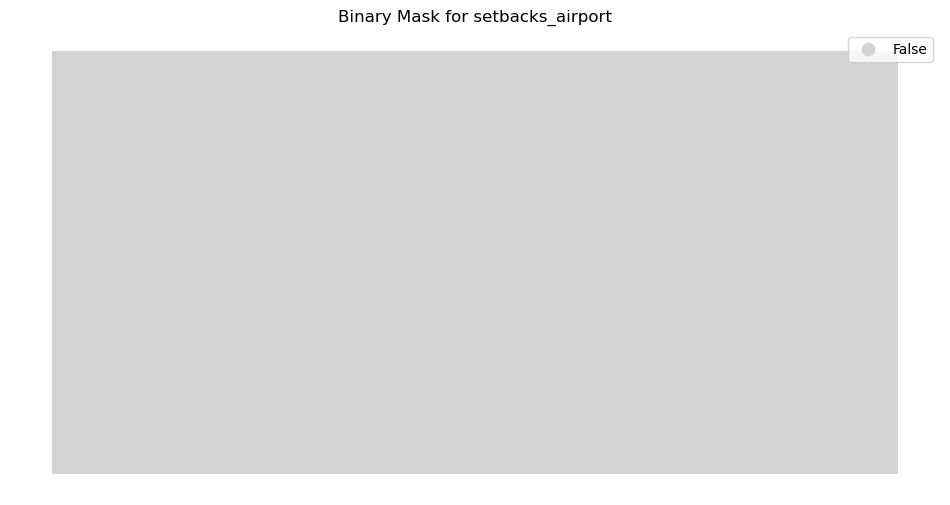

setbacks_buildings
False    53011
True     26989
Name: count, dtype: int64

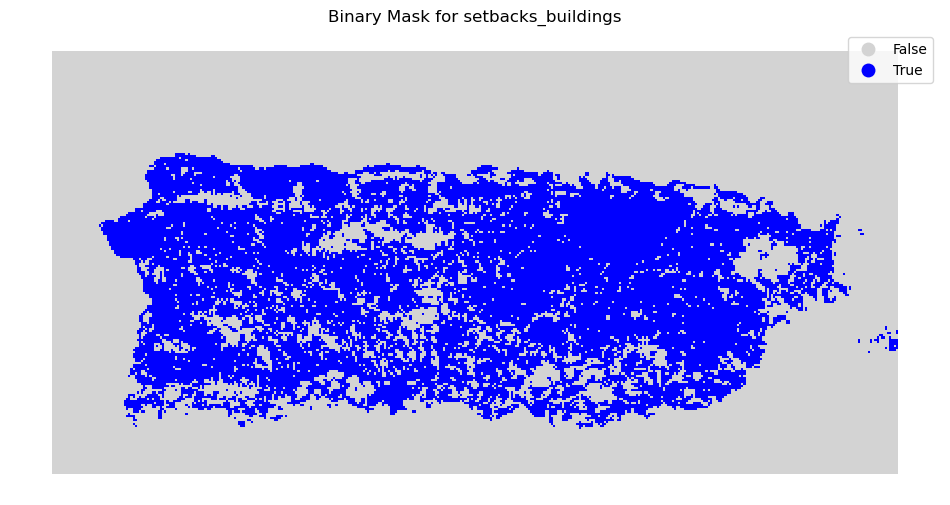

federal_and_state_waters
False    47645
True     32355
Name: count, dtype: int64

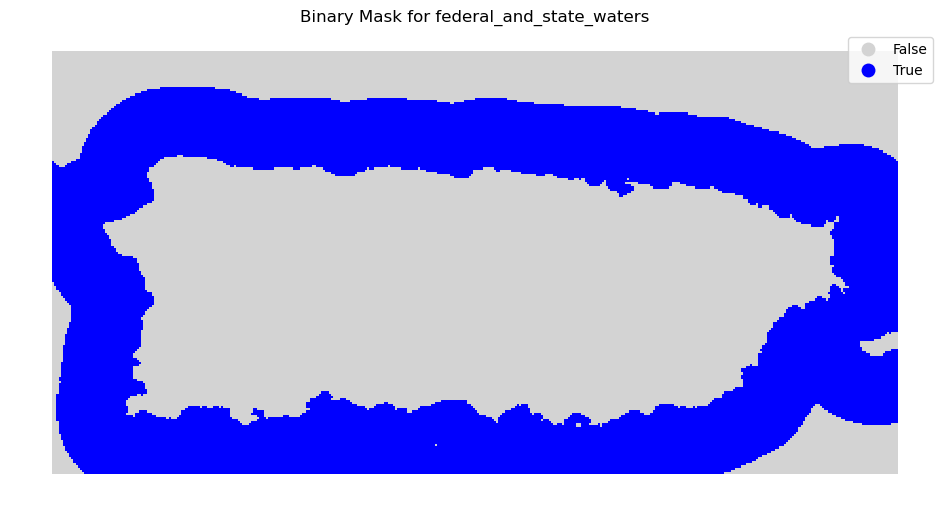

coastal_zone_mgmt_act_boundary
True     49265
False    30735
Name: count, dtype: int64

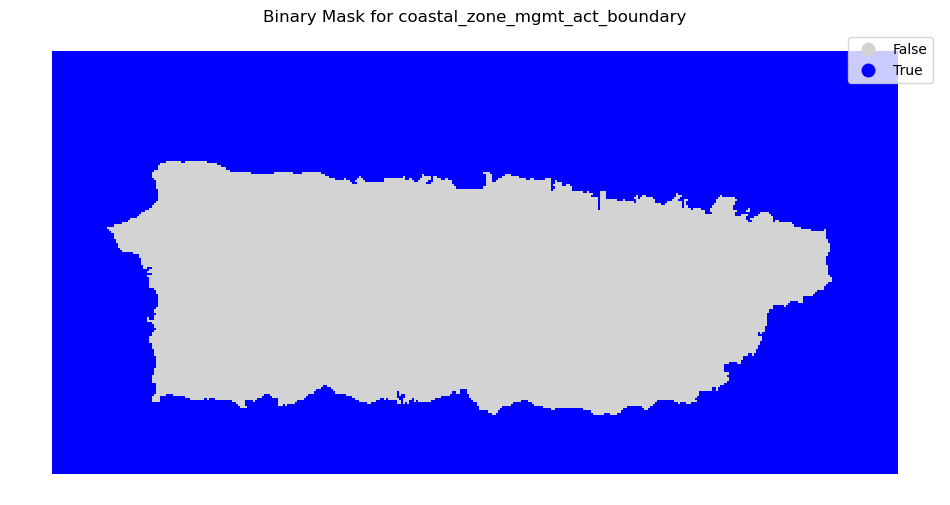

land_protected_areas
False    71312
True      8688
Name: count, dtype: int64

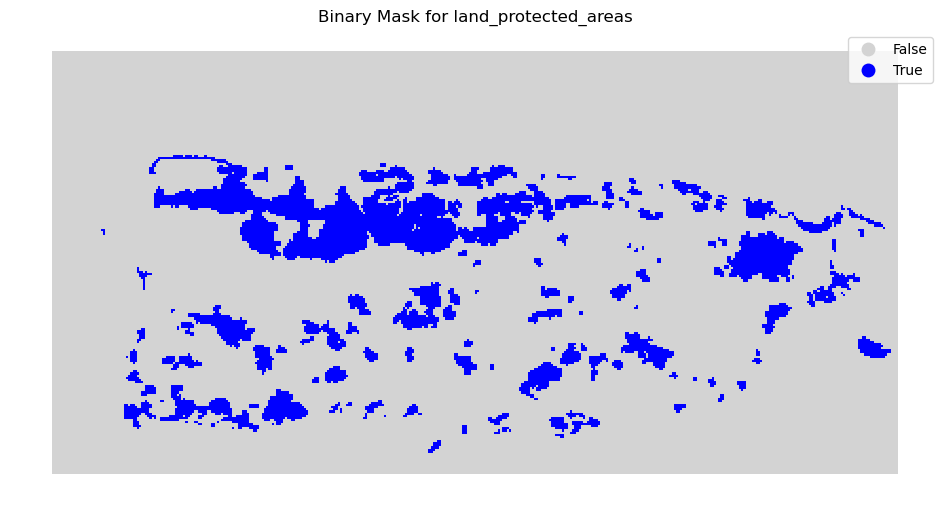

water_bodies
False    52394
True     27606
Name: count, dtype: int64

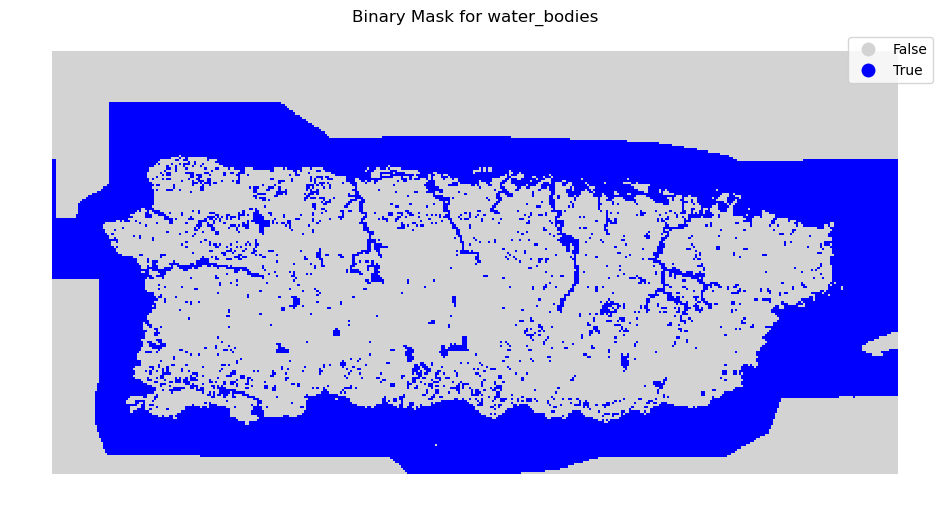

wrecks_and_obstructions
False    80000
Name: count, dtype: int64

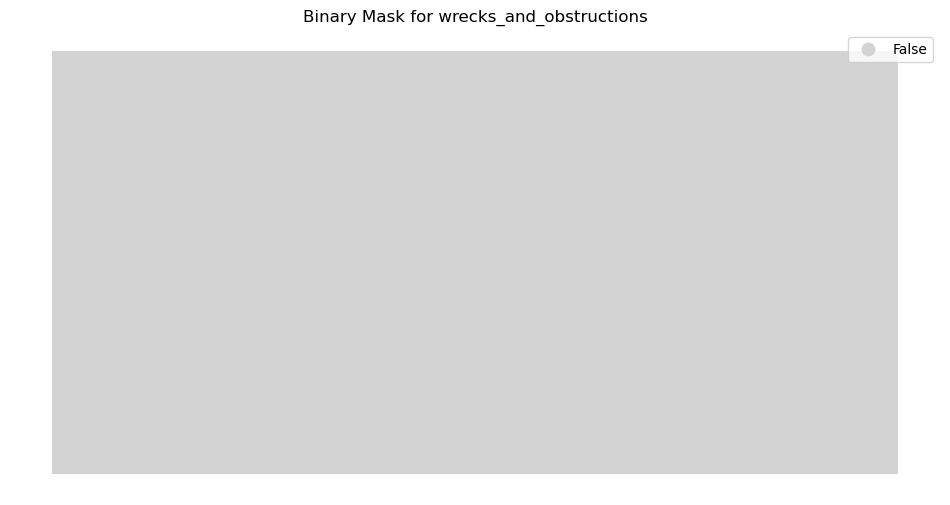

ocean_disposal_sites
False    78291
True      1709
Name: count, dtype: int64

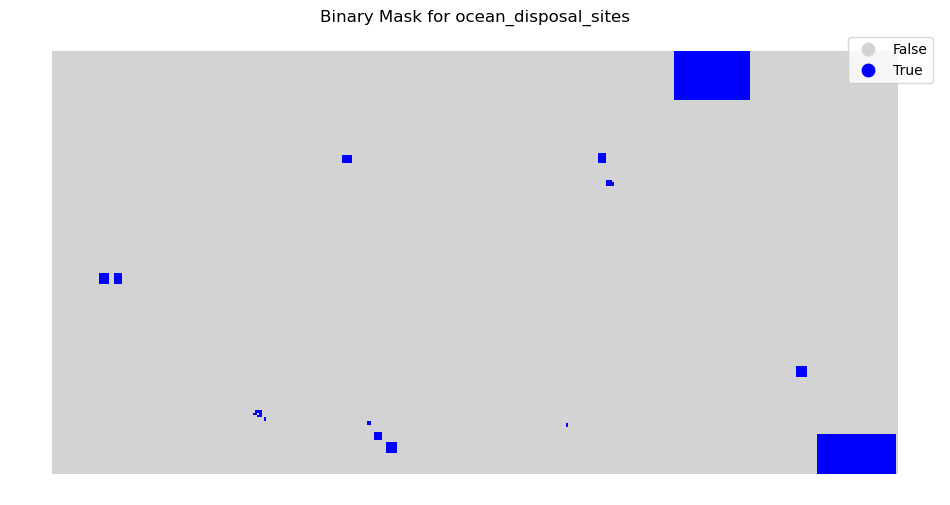

tropical_cyclone_storm_segments
False    80000
Name: count, dtype: int64

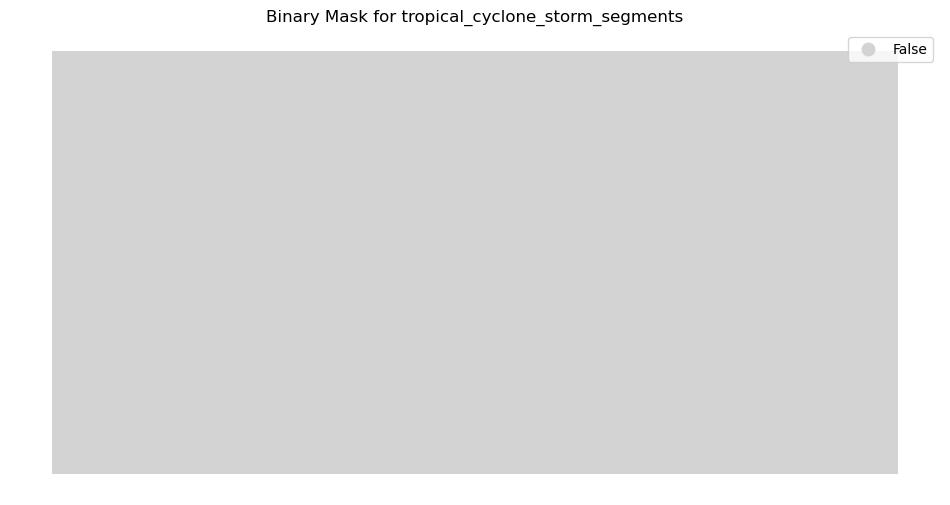

tropical_cyclone_wind_exposure
True    80000
Name: count, dtype: int64

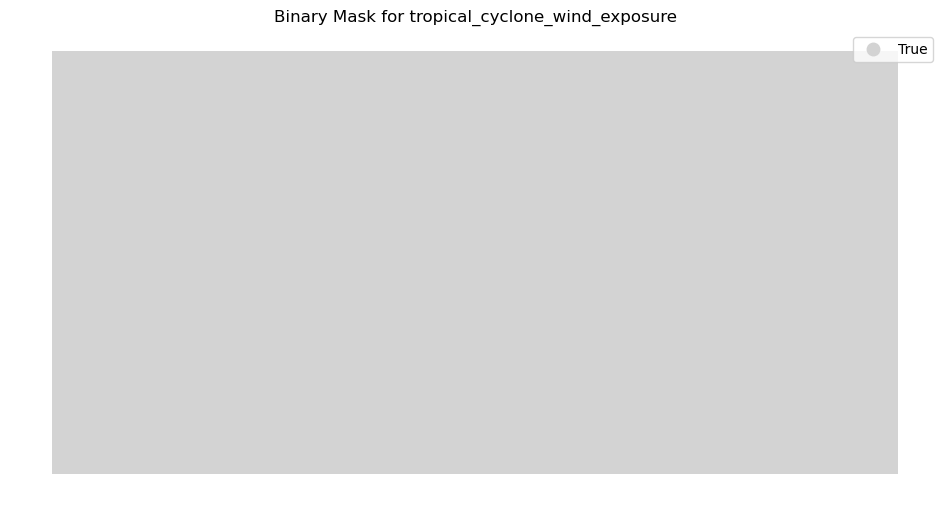

unexploded_ordinance_areas_fuds
False    80000
Name: count, dtype: int64

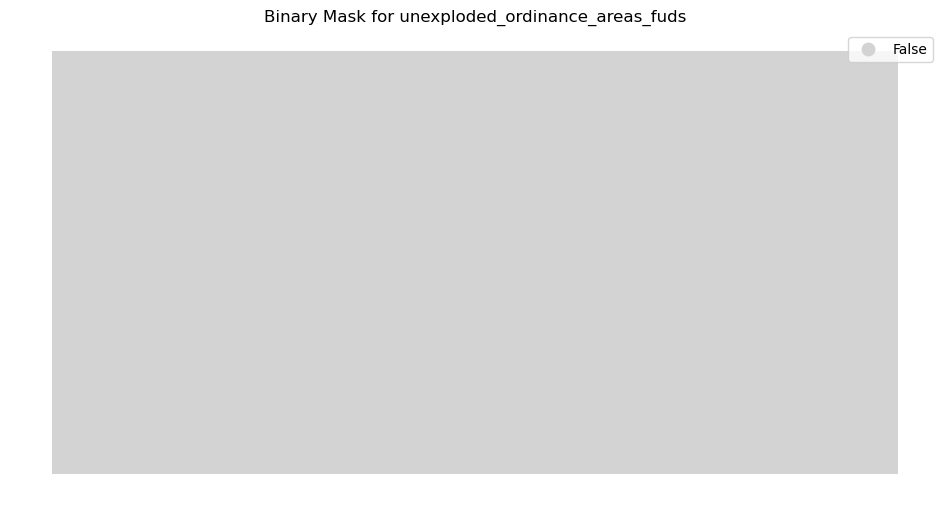

danger_zones_and_restricted_areas
False    78198
True      1802
Name: count, dtype: int64

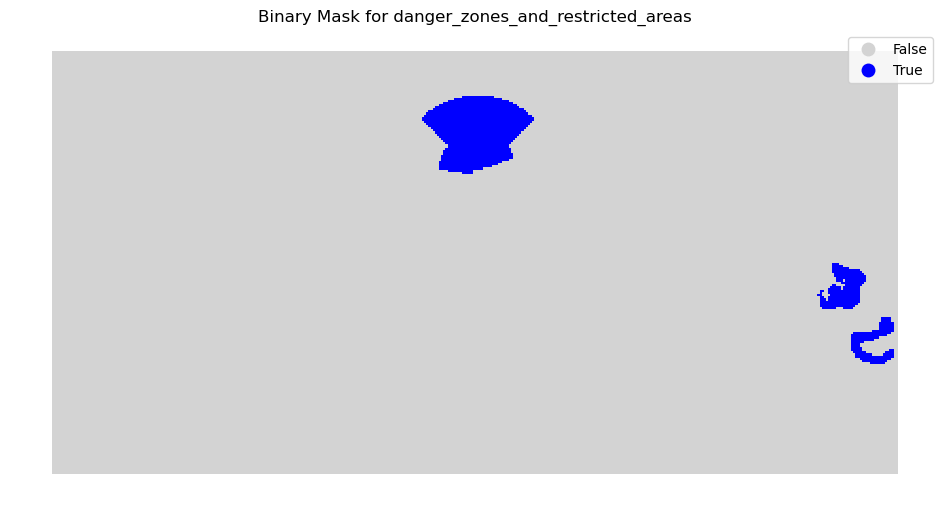

unexploded_ordinance_areas
False    77085
True      2915
Name: count, dtype: int64

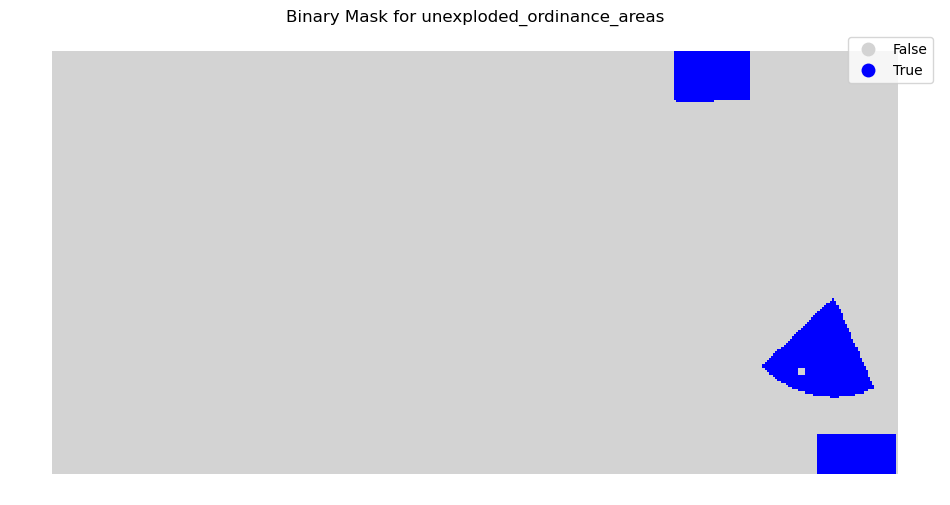

In [331]:

# Define colors for True and False
color_true = 'blue'
color_false = 'lightgrey'

for column in environment_gdf.columns:
    if column == 'geometry' or column == 'index_grid':
        continue
    
    # Get value counts and display them
    value_counts = environment_gdf[column].value_counts()
    display(value_counts)
    
    # Create a new figure and axis for the plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Plot using different colors for True and False
    environment_gdf.plot(column=column, ax=ax, 
                         cmap=plt.matplotlib.colors.ListedColormap([color_false, color_true]),
                         legend=True, 
                         categorical=True,
                         legend_kwds={'loc': 'upper right', 'bbox_to_anchor': (1, 1)})
    
    # Set the title and remove the axes for a cleaner look
    plt.title(f'Binary Mask for {column}')
    ax.axis('off')
    
    # Show the plot
    plt.show()


In [333]:
def get_count_in_grid_cell(filepath, crs, main_gdf):
    gdf = get_gdf(filepath)
    gdf.set_crs(crs, inplace=True)
    gdf = gdf.to_crs('EPSG:32161')
    joined_gdf = gpd.sjoin(main_gdf, gdf[['geometry']], how='left', op='intersects')
    count = joined_gdf.groupby('index').size()
    return count

In [335]:
environment_intersection_gdf = create_grid(100000, 300000, 200000, 300000, 500)
environment_intersection_gdf.index.name = 'index'
#environment_gdf['index_grid'] = environment_gdf.index

In [336]:
for col, values in columns.items():
    print(f'Processing {col}')
    count = get_count_in_grid_cell(values[0], values[1], environment_intersection_gdf)
    if values[2] == 'density':
        environment_intersection_gdf[col] = count.reindex(environment_intersection_gdf.index, fill_value=0)
    else:
        environment_intersection_gdf[col] = count > 1
        environment_intersection_gdf[col].fillna(False, inplace=True)
    display(environment_intersection_gdf[col].value_counts())  

Processing marine_protected_areas


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


marine_protected_areas
False    79644
True       356
Name: count, dtype: int64

Processing land_nationwide_hapc


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


land_nationwide_hapc
False    79943
True        57
Name: count, dtype: int64

Processing artificial_reefs


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


artificial_reefs
False    42233
True     37767
Name: count, dtype: int64

Processing nationwide_hapc


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


nationwide_hapc
False    80000
Name: count, dtype: int64

Processing areas_protegidas_agencia


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


areas_protegidas_agencia
False    78303
True      1697
Name: count, dtype: int64

Processing noaa_charted_submarine_cables_30m_buffer


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


noaa_charted_submarine_cables_30m_buffer
False    79755
True       245
Name: count, dtype: int64

Processing setbacks_xmission


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


setbacks_xmission
False    77349
True      2651
Name: count, dtype: int64

Processing submarine_cable_30m_buffer


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


submarine_cable_30m_buffer
False    80000
Name: count, dtype: int64

Processing pipeline_areas


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


pipeline_areas
False    80000
Name: count, dtype: int64

Processing setbacks_roads


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


setbacks_roads
1      53177
3       2814
2       2635
4       2216
5       2072
       ...  
137        1
112        1
142        1
100        1
117        1
Name: count, Length: 128, dtype: int64

Processing setbacks_runway


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


setbacks_runway
False    79999
True         1
Name: count, dtype: int64

Processing setbacks_airport


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


setbacks_airport
False    79998
True         2
Name: count, dtype: int64

Processing setbacks_buildings


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


setbacks_buildings
1      54678
2       1155
3        914
4        811
6        709
       ...  
728        1
491        1
894        1
446        1
418        1
Name: count, Length: 592, dtype: int64

Processing federal_and_state_waters


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


federal_and_state_waters
False    80000
Name: count, dtype: int64

Processing coastal_zone_mgmt_act_boundary


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


coastal_zone_mgmt_act_boundary
False    79205
True       795
Name: count, dtype: int64

Processing land_protected_areas


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


land_protected_areas
False    78543
True      1457
Name: count, dtype: int64

Processing water_bodies


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


water_bodies
False    77726
True      2274
Name: count, dtype: int64

Processing wrecks_and_obstructions


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


wrecks_and_obstructions
False    79989
True        11
Name: count, dtype: int64

Processing ocean_disposal_sites


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


ocean_disposal_sites
False    80000
Name: count, dtype: int64

/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


Processing tropical_cyclone_storm_segments


tropical_cyclone_storm_segments
False    79589
True       411
Name: count, dtype: int64

Processing tropical_cyclone_wind_exposure


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


tropical_cyclone_wind_exposure
False    63767
True     16233
Name: count, dtype: int64

Processing unexploded_ordinance_areas_fuds


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


unexploded_ordinance_areas_fuds
False    80000
Name: count, dtype: int64

Processing danger_zones_and_restricted_areas


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


danger_zones_and_restricted_areas
False    79878
True       122
Name: count, dtype: int64

Processing unexploded_ordinance_areas


/home/kevin/Projects/gtomscs/dl/GreenGridPR/environment/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


unexploded_ordinance_areas
False    80000
Name: count, dtype: int64

marine_protected_areas
False    79644
True       356
Name: count, dtype: int64

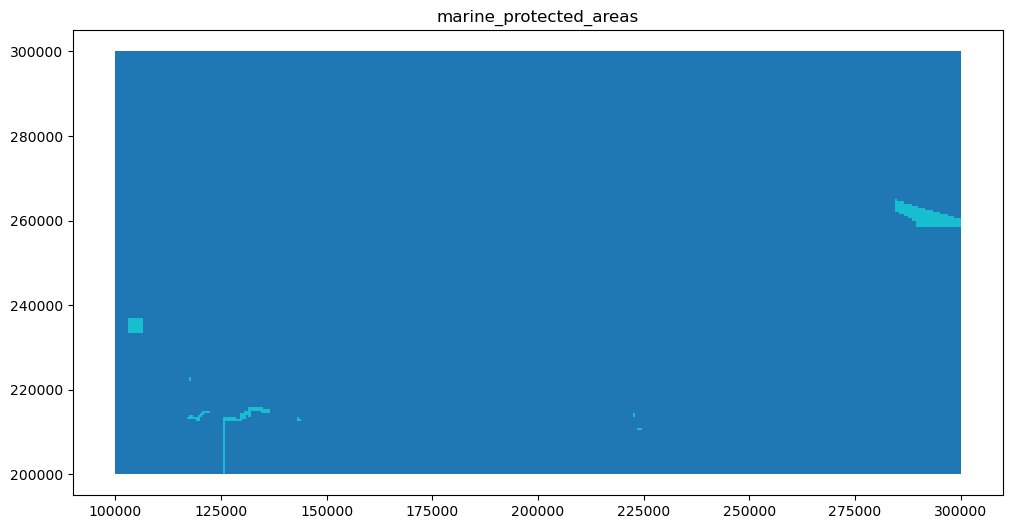

land_nationwide_hapc
False    79943
True        57
Name: count, dtype: int64

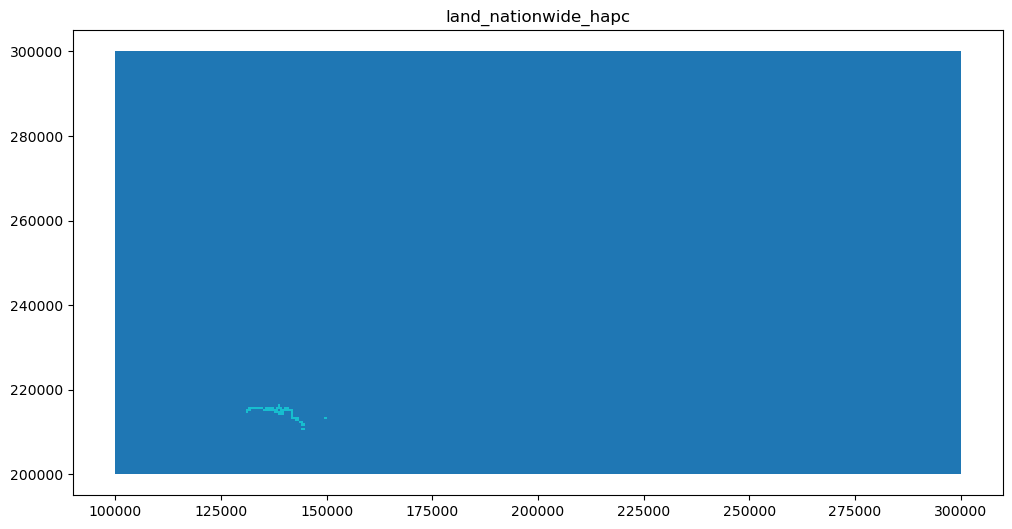

artificial_reefs
False    42233
True     37767
Name: count, dtype: int64

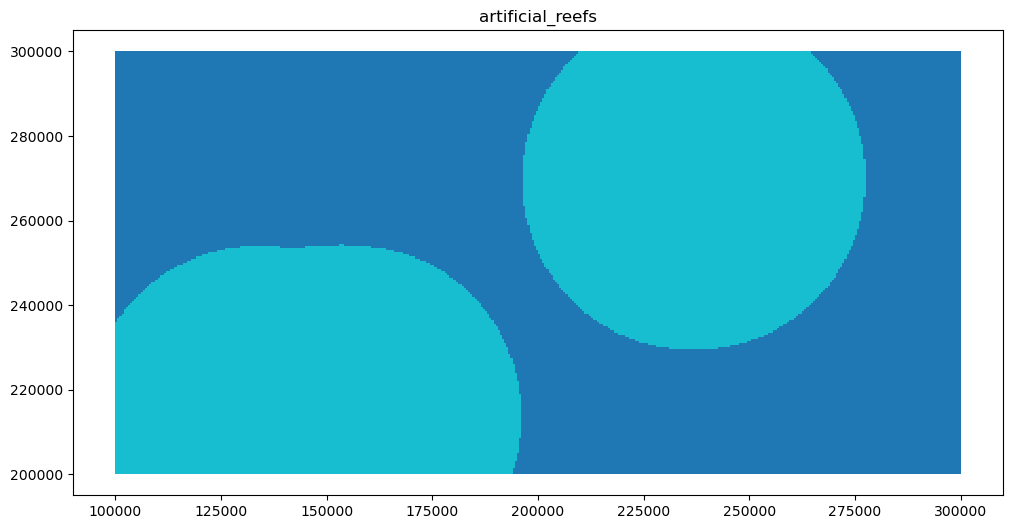

nationwide_hapc
False    80000
Name: count, dtype: int64

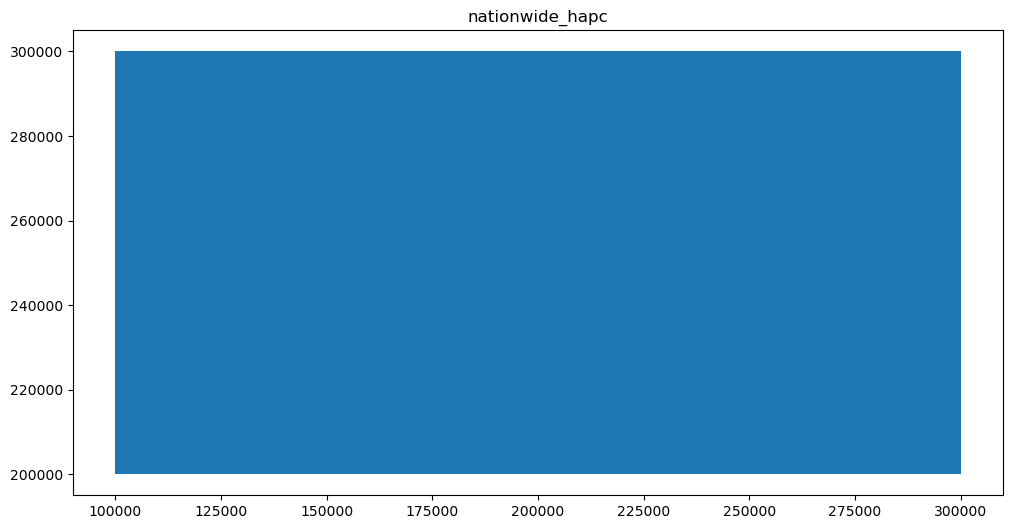

areas_protegidas_agencia
False    78303
True      1697
Name: count, dtype: int64

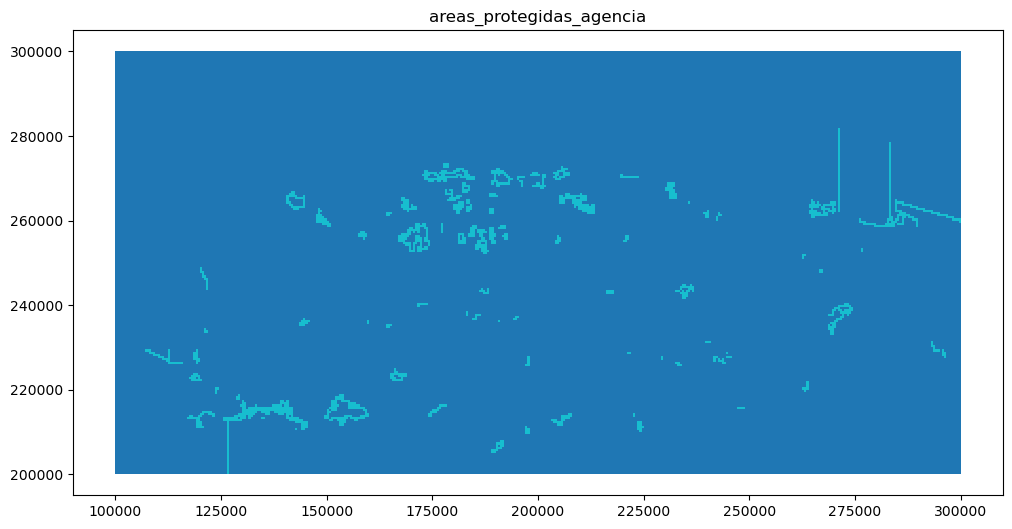

noaa_charted_submarine_cables_30m_buffer
False    79755
True       245
Name: count, dtype: int64

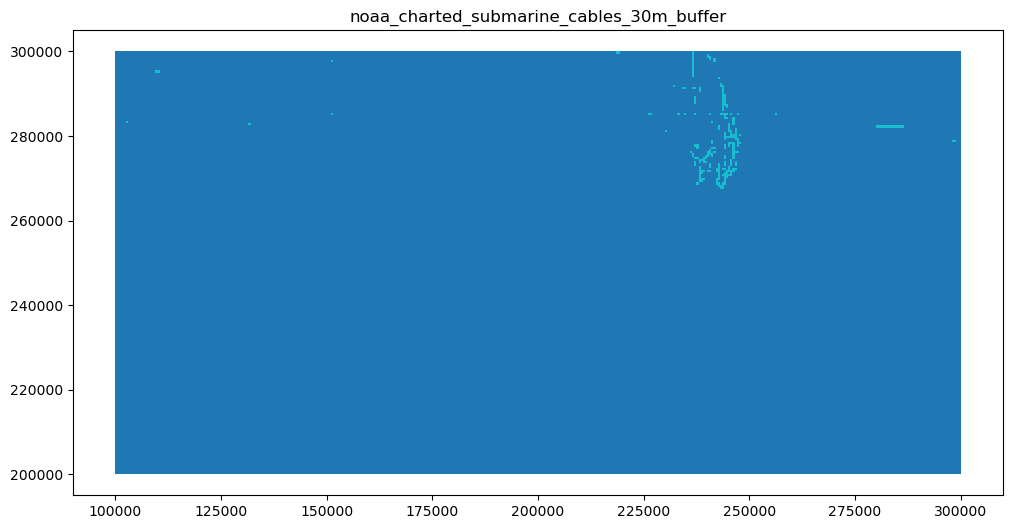

setbacks_xmission
False    77349
True      2651
Name: count, dtype: int64

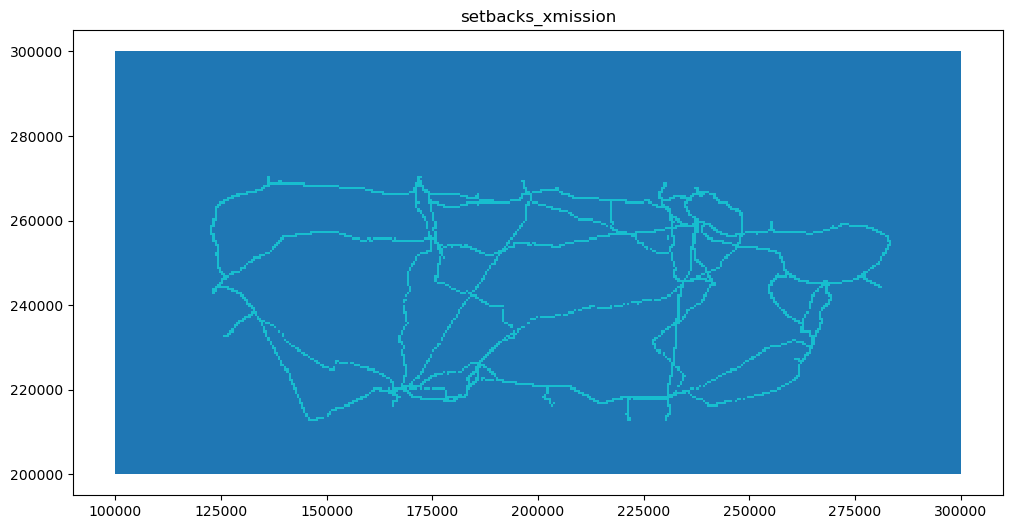

submarine_cable_30m_buffer
False    80000
Name: count, dtype: int64

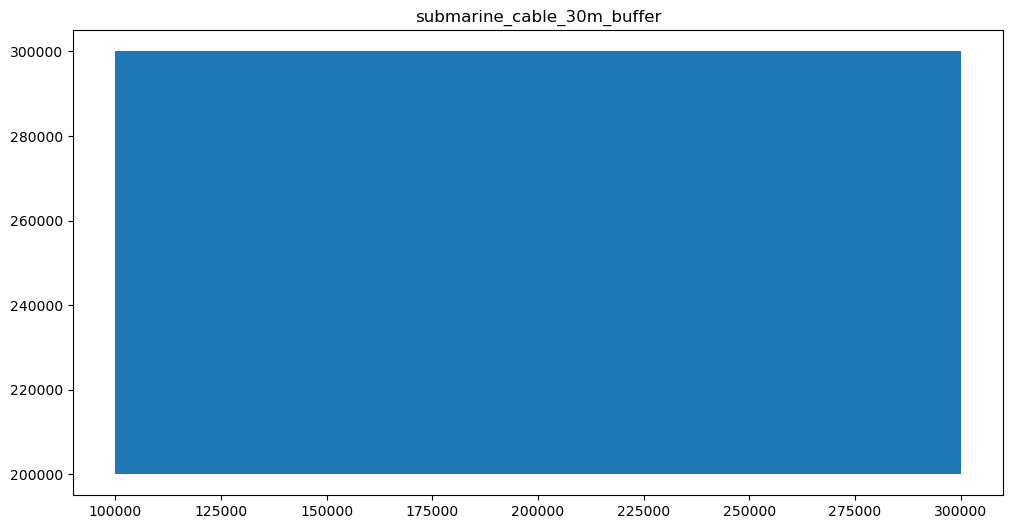

pipeline_areas
False    80000
Name: count, dtype: int64

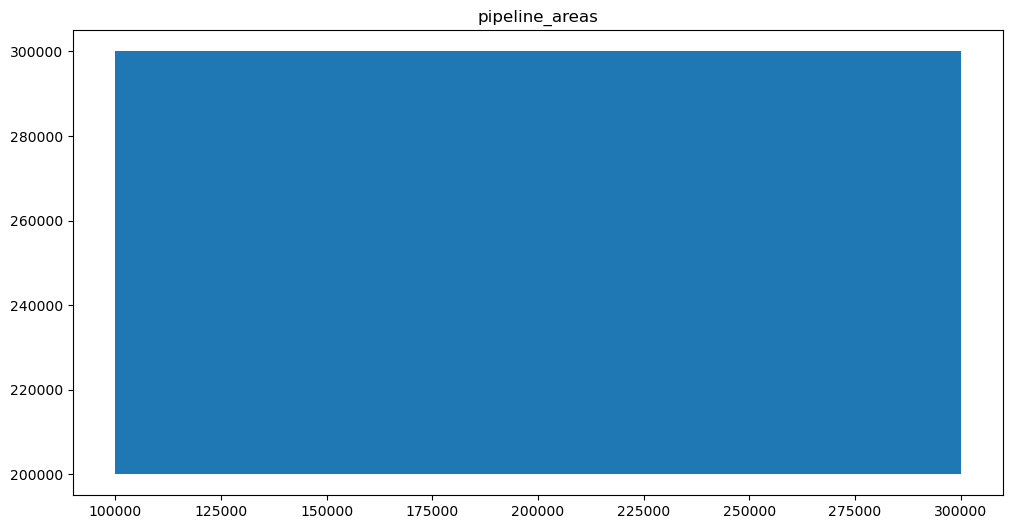

setbacks_roads
1      53177
3       2814
2       2635
4       2216
5       2072
       ...  
137        1
112        1
142        1
100        1
117        1
Name: count, Length: 128, dtype: int64

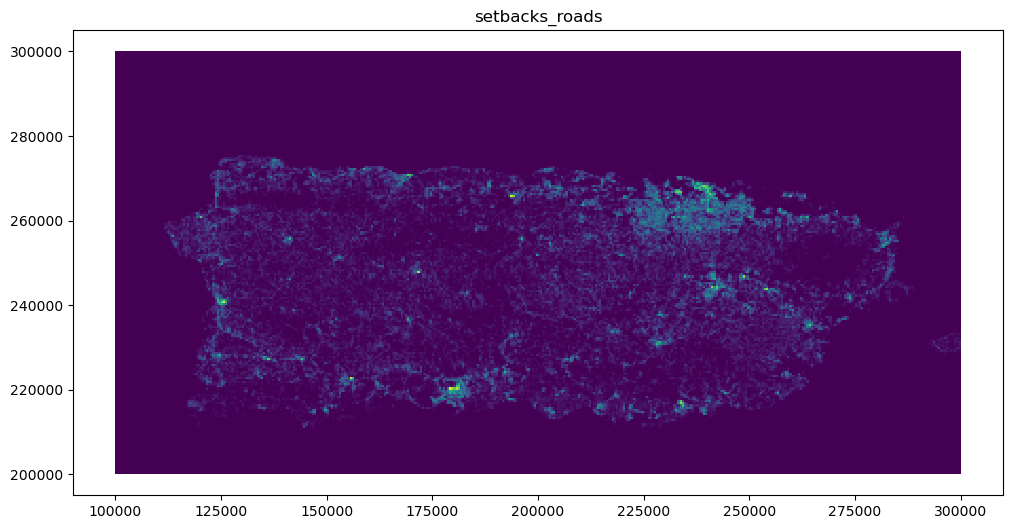

setbacks_runway
False    79999
True         1
Name: count, dtype: int64

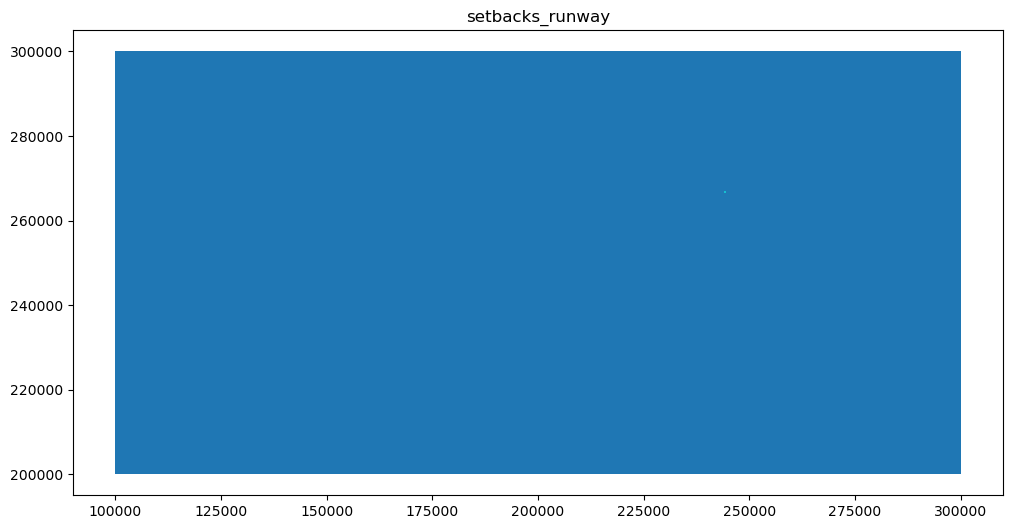

setbacks_airport
False    79998
True         2
Name: count, dtype: int64

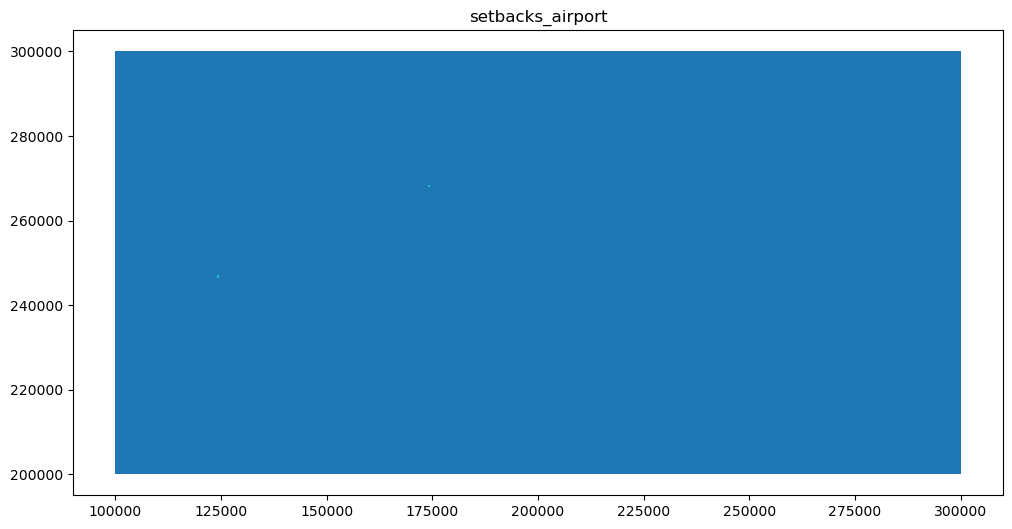

setbacks_buildings
1      54678
2       1155
3        914
4        811
6        709
       ...  
728        1
491        1
894        1
446        1
418        1
Name: count, Length: 592, dtype: int64

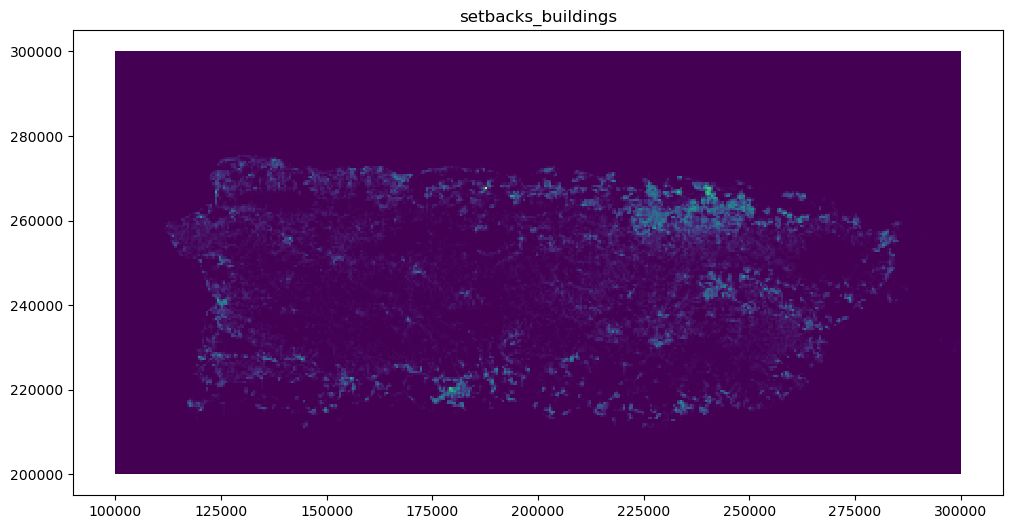

federal_and_state_waters
False    80000
Name: count, dtype: int64

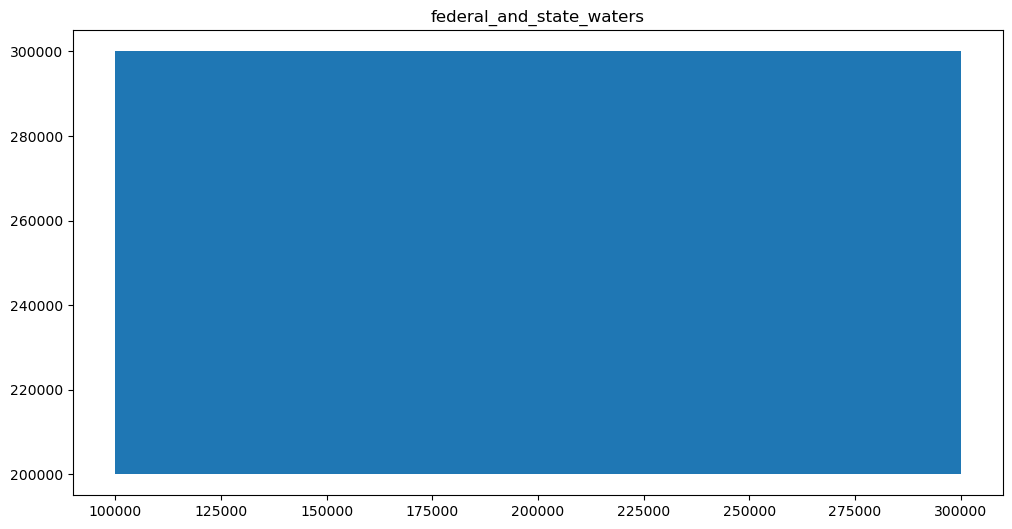

coastal_zone_mgmt_act_boundary
False    79205
True       795
Name: count, dtype: int64

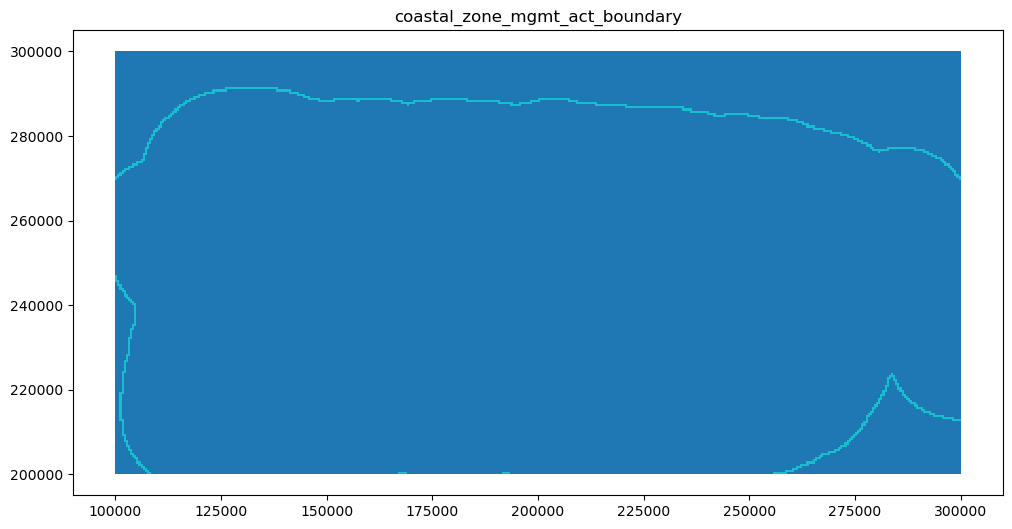

land_protected_areas
False    78543
True      1457
Name: count, dtype: int64

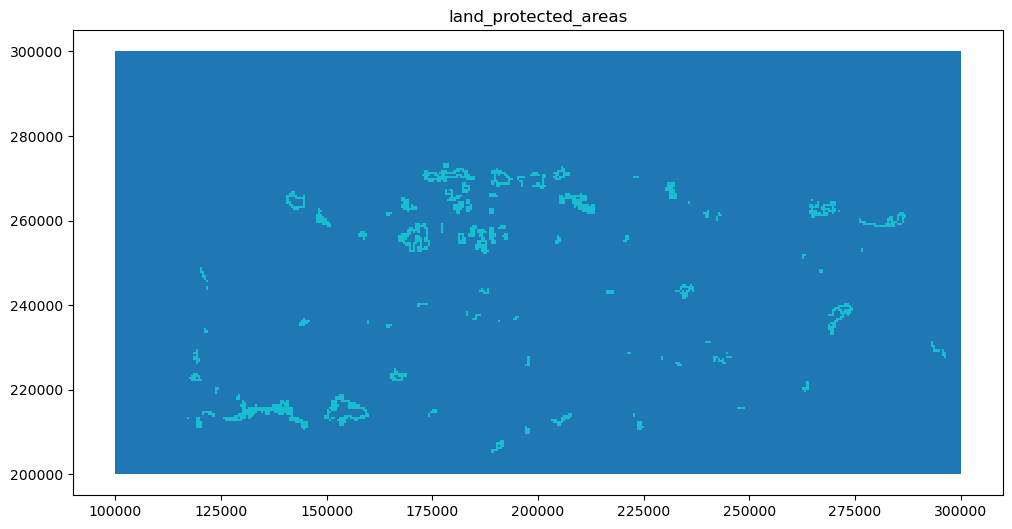

water_bodies
False    77726
True      2274
Name: count, dtype: int64

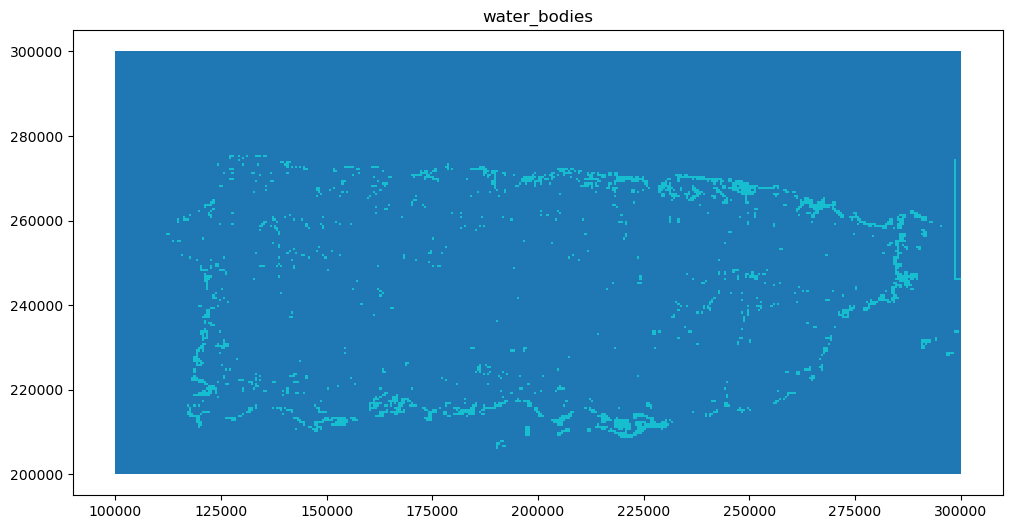

wrecks_and_obstructions
False    79989
True        11
Name: count, dtype: int64

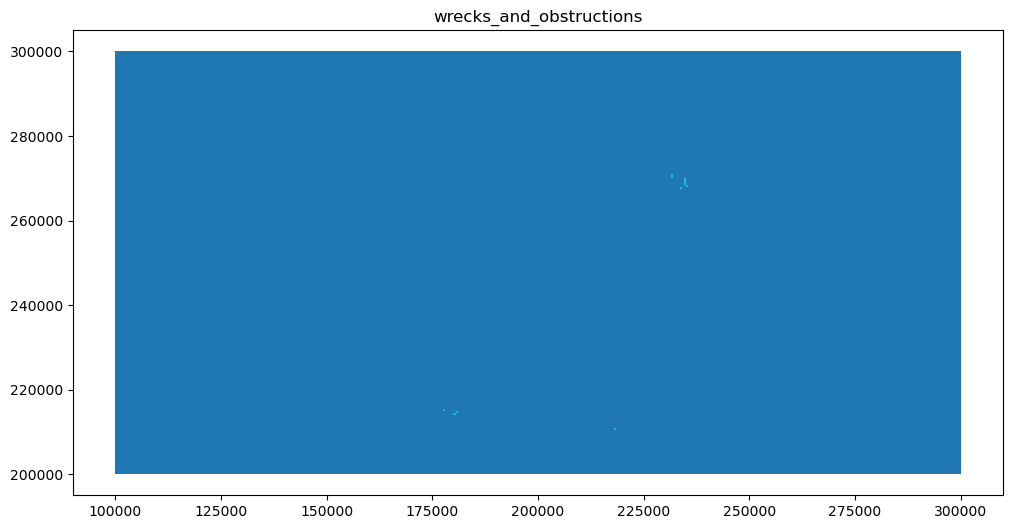

ocean_disposal_sites
False    80000
Name: count, dtype: int64

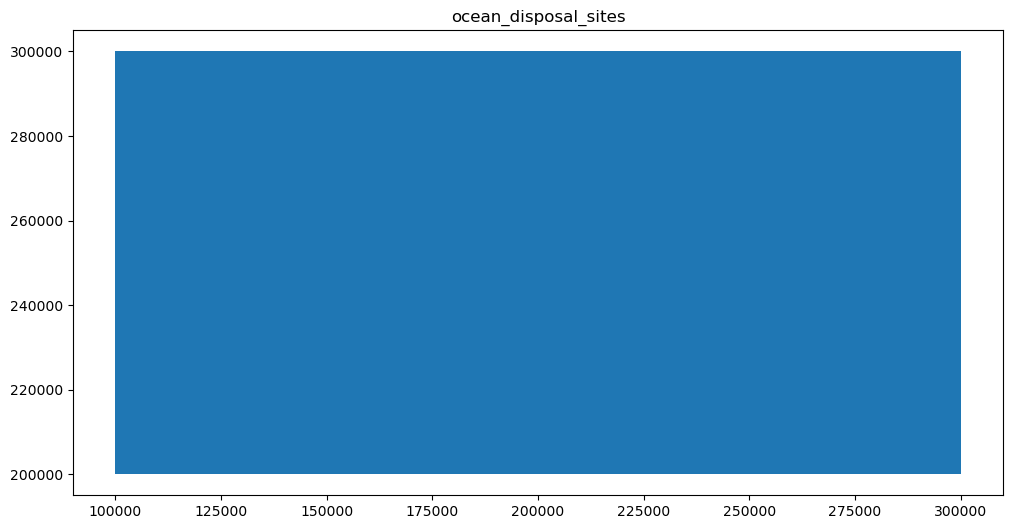

tropical_cyclone_storm_segments
False    79589
True       411
Name: count, dtype: int64

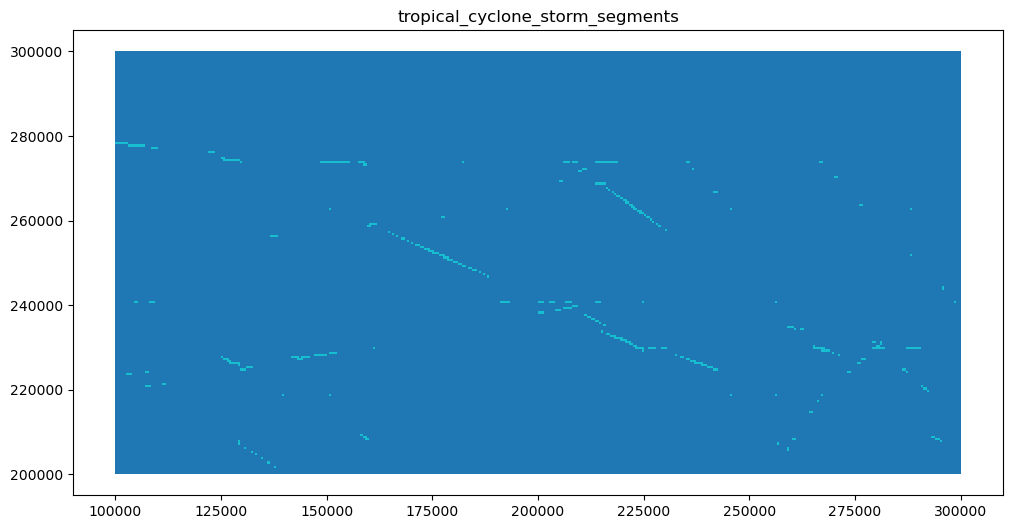

tropical_cyclone_wind_exposure
False    63767
True     16233
Name: count, dtype: int64

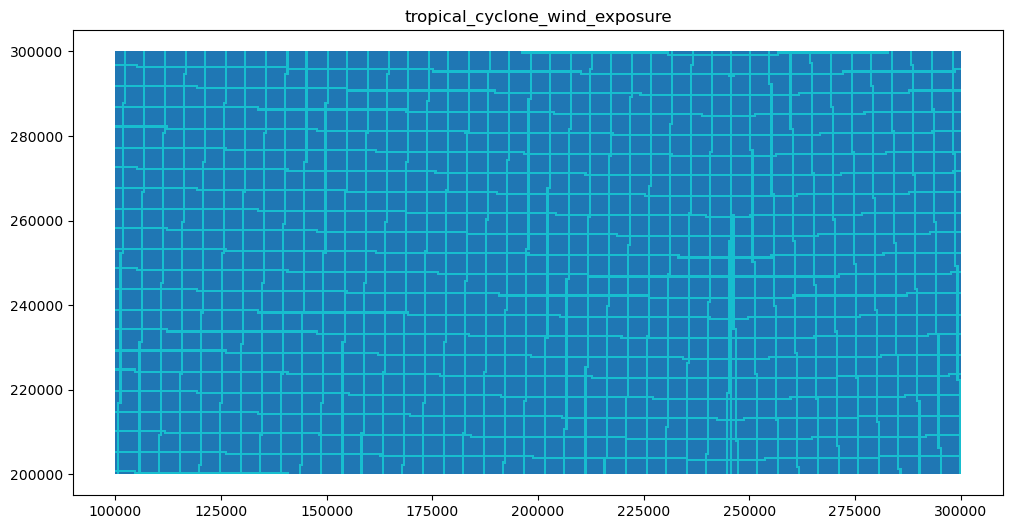

unexploded_ordinance_areas_fuds
False    80000
Name: count, dtype: int64

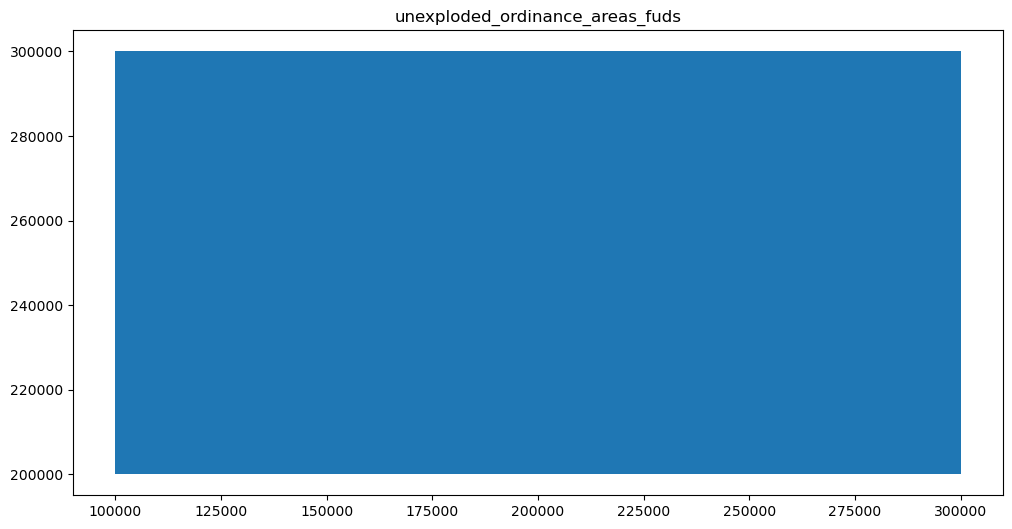

danger_zones_and_restricted_areas
False    79878
True       122
Name: count, dtype: int64

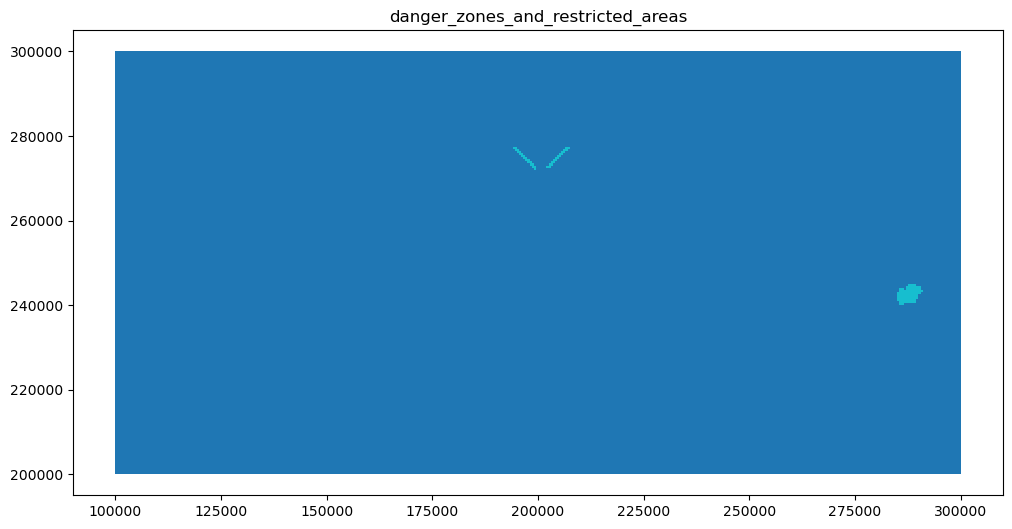

unexploded_ordinance_areas
False    80000
Name: count, dtype: int64

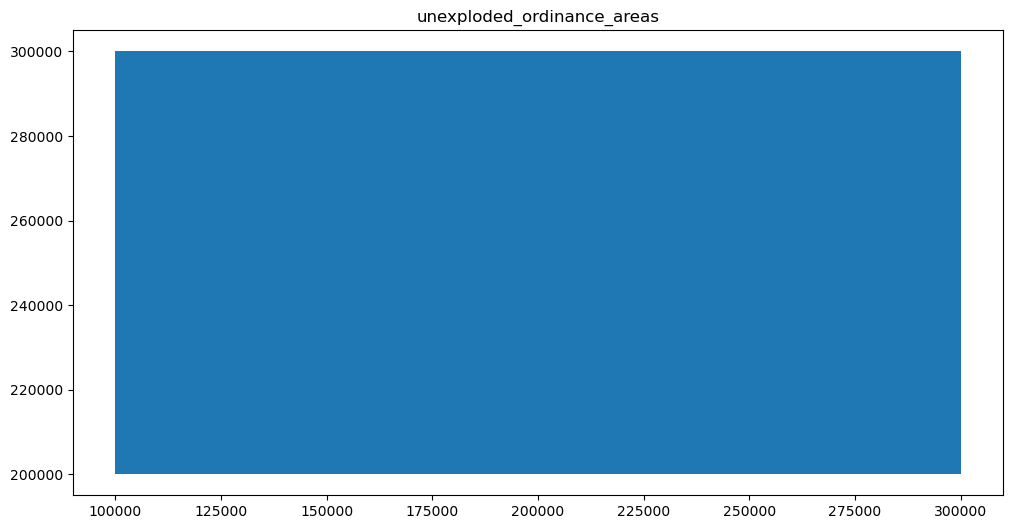

In [337]:
for column in environment_intersection_gdf.columns:
    if column == 'geometry':
        continue
    display(environment_intersection_gdf[column].value_counts())
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    environment_intersection_gdf.plot(column=column, ax=ax)
    plt.title(column)
    plt.show()

# Processing points

In [342]:
airport_setbacks

,OBJECTID,permanent_,source_fea,source_dat,source_d_1,source_ori,loaddate,ftype,fcode,faa_airpor,name,gnis_id,ownertype,ownership,geometry
0,1,52ba289f-924a-48b0-bafb-a206b6aa9996,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,201,20100,SIG,09/27,None,1,1,POINT (-66.09814956617578 18.45683332655966)
1,2,{4CED7A73-E71D-4601-8A55-F2F1D082AFA3},None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,201,20100,PR20,12/30,None,2,1,POINT (-66.75610762973787 18.180119431155845)
2,3,f901ac9d-e14c-45fb-87aa-d72ea7a6c875,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,201,20100,X63,10/28,None,1,1,POINT (-65.80069138851252 18.138067671846102)
3,4,b10bc687-2d41-4214-a962-030b366431cb,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,201,20100,SJU,08/26,None,1,1,POINT (-66.002257109033 18.44387796095475)
4,5,00e49c1f-fff2-4f54-8be7-1fbf931763f6,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,200,20000,PR10,Boqueron Airport,2443851,2,1,POINT (-67.13689682185515 18.012377465791246)
5,6,0a0d2b05-ed77-4bf3-b0b9-9aa0c47b2175,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,201,20100,RVR,07/25,None,1,1,POINT (-65.64338178979835 18.24517295501323)
6,7,f9f03611-769c-4477-af43-4cc839cb7766,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,200,20000,PSE,Mercedita Airport,1613302,1,1,POINT (-66.5624661529551 18.009760199128607)
7,8,5f1f178a-f944-4a43-ac7f-95d51a02f635,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,200,20000,ABO,Antonio/Nery/Juarbe Pol Airport,1613286,1,1,POINT (-66.67496277153049 18.450060944278505)
8,9,37925659-7a78-4536-97d6-0619aad24143,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,201,20100,MAZ,09/27,None,1,1,POINT (-67.14818234267096 18.255759866455094)
9,10,7303f447-b086-4afd-aca1-41eb63cda417,None,{5A23F3CF-C3EB-4C80-8E3C-4BB35EC03748},"Public and Private Airports, Heliports, and Se...",Federal Aviation Administration,2021-06-22,200,20000,MAZ,Eugenio Maria de Hostos Airport,1613299,1,1,POINT (-67.14965959891867 18.254303620624057)


In [409]:
xmission_gdf = get_gdf('../../data/PR100/Infrastructure/setbacks_xmission.parquet')

In [410]:
xmission_gdf

,G3E_FNO,G3E_FID,CD_STATE,TRANS_V_KV,CD_OH_UG,CONDITION,NODE1_ID,NODE2_ID,CD_PHASE,CIRCUIT1,CD_STATUS,CONFIGURAT,OHGW_SZMAT,SIZE_MATER,CONBY_OHGW,COND_BY_PH,geometry
0,41,6669721,In Service,115.0,OH,Normal,1000030072,1000304577,ABC,40200,Closed,Horizontal,None,795 ACSR,0,1,"MULTILINESTRING ((231080.050 214294.978, 23110..."
1,41,6669724,In Service,115.0,OH,Normal,1000030073,1000304576,ABC,40100,Closed,Horizontal,None,795 ACSR,0,1,"MULTILINESTRING ((231091.822 214293.893, 23110..."
2,41,6669727,In Service,115.0,OH,Normal,1000424193,1000304578,ABC,37800,Closed,Horizontal,None,556 ACSR,0,1,"MULTILINESTRING ((231133.040 214294.215, 23114..."
3,41,6669730,In Service,115.0,OH,Normal,6669731,1000304698,ABC,36300,Closed,Horizontal,None,795 ACSR,0,1,"MULTILINESTRING ((231163.828 214236.762, 23115..."
4,41,6669733,In Service,115.0,OH,Normal,6669731,1000030075,ABC,36300,Closed,Horizontal,None,795 ACSR,0,1,"MULTILINESTRING ((231163.828 214236.762, 23114..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8654,41,1001919413,In Service,115.0,OH,Normal,1000442928,1000442929,ABC,39000,Closed,Horizontal,"1/2"" steel",1192 ACSR,1,1,"MULTILINESTRING ((230593.152 255946.624, 23061..."
8655,41,1001919415,In Service,115.0,OH,Normal,1000442929,0,ABC,39000,Closed,Horizontal,"1/2"" steel",1192 ACSR,1,1,"MULTILINESTRING ((230610.778 255977.929, 23064..."
8656,41,1001919416,In Service,115.0,OH,Normal,0,1000442930,ABC,39000,Closed,Horizontal,"1/2"" steel",1192 ACSR,1,1,"MULTILINESTRING ((230659.182 256051.725, 23069..."
8657,41,1001919418,In Service,115.0,OH,Normal,1000442931,0,ABC,39000,Closed,Horizontal,"1/2"" steel",1192 ACSR,1,1,"MULTILINESTRING ((230694.696 256156.552, 23081..."


In [368]:
wrecks_gdf = get_gdf('../../data/PR100/Hazards/wrecks_and_obstructions.parquet')
wrecks_gdf.set_crs('EPSG:4326', inplace=True)
wrecks_gdf.to_crs(environment_gdf.crs, inplace=True)

# Add a binary column for point presence, default to False
environment_gdf['wrecks_points'] = False

# Calculate the grid cell indices based on the points' coordinates
x_min, y_min, x_max, y_max = environment_gdf.total_bounds
cell_width = 500  # the width of your grid cells
cell_height = 500  # the height of your grid cells

# Calculate grid cell indices for x and y coordinates
wrecks_gdf['cell_x'] = ((wrecks_gdf.geometry.x - x_min) // cell_width).astype(int)
wrecks_gdf['cell_y'] = ((wrecks_gdf.geometry.y - y_min) // cell_height).astype(int)
environment_gdf['cell_x'] = ((environment_gdf.geometry.bounds.minx - x_min) // cell_width).astype(int)
environment_gdf['cell_y'] = ((environment_gdf.geometry.bounds.miny - y_min) // cell_height).astype(int)


# Update the grid cells in environment_gdf that contain points
for index, row in wrecks_gdf.iterrows():
    grid_cell = environment_gdf.loc[(environment_gdf['cell_x'] == row['cell_x']) & (environment_gdf['cell_y'] == row['cell_y'])]
    if not grid_cell.empty:
        environment_gdf.loc[grid_cell.index, 'wrecks_points'] = True

In [369]:
wrecks_gdf

,record,vesselTerms,areaIdentifier,chart,positionQuality,positionSource,depth,soundingType,yearSunk,history,latitudeDD,longitudeDD,geometry,cell_x,cell_y
0,15118.0,WRECK,A,12350,Med,Direct,15.0,Feet and tenths,NaN,L-1525(71)--Visible wreck located in approxi...,40.584214,-73.831692,POINT (-479470.452 2803078.156),-1159,5206
1,8896.0,UNKNOWN,A,13315,High,Direct,21.0,Feet and tenths,NaN,\r\n HISTORY\r\n H7834/50-- 47-53FT DEPTHS EX...,44.191256,-68.442653,POINT (20258.344 3231636.821),-160,6063
2,11928.0,UNKNOWN,A,13281,High,Direct,4.0,Meters and tenths,NaN,LNM32/73 (7/11/73)-- MASSACHUSETTS-GLOUCESTE...,42.610194,-70.658381,POINT (-182423.480 3039919.831),-565,5679
3,11932.0,UNKNOWN,A,13281,High,Direct,5.0,Meters and tenths,NaN,LNM29/73 (6/27/73)-- MASSACHUSETTS-GLOUCESTE...,42.614592,-70.654367,POINT (-182047.801 3040450.284),-565,5680
4,10646.0,UNKNOWN,A,13270,High,Direct,33.0,Feet and tenths,NaN,"HISTORY\r\n CL483/00--USACE (BILL KAVANAUGH,...",42.367336,-70.917378,POINT (-206589.562 3010756.106),-614,5621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12655,3408.0,OBSTRUCTION,Z,14974,High,Scaled,0.0,,NaN,"\r\nHISTORY\r\nLS896/01; PIER, SCALED AT ...",46.665869,-90.893650,POINT (-1940135.250 3685261.924),-4081,6970
12656,3409.0,OBSTRUCTION,Z,14974,High,Scaled,0.0,,NaN,"\r\nHISTORY\r\nLS896/01; RR PIER, SCALED ...",46.666961,-90.897814,POINT (-1940478.864 3685448.552),-4081,6970
12657,3410.0,OBSTRUCTION,Z,14974,High,Scaled,0.0,,NaN,"HISTORY\r\nLS896/01; RR PIER, SCALED AT 1:1000...",46.666297,-90.900536,POINT (-1940726.877 3685396.485),-4082,6970
12658,3411.0,OBSTRUCTION,Z,14974,High,Scaled,0.0,,NaN,\r\nHISTORY\r\nLS896/01--LUMBER PIER; SCA...,46.660000,-90.899722,POINT (-1940763.006 3684591.460),-4082,6969


In [356]:
airport_setbacks_gdf = gpd.GeoDataFrame(airport_setbacks, geometry='geometry')
airport_setbacks_gdf.set_crs('EPSG:4326', inplace=True)
airport_setbacks_gdf.to_crs(environment_gdf.crs, inplace=True)

# Add a binary column for point presence, default to False
environment_gdf['airport_setbacks_points'] = False

# Calculate the grid cell indices based on the points' coordinates
x_min, y_min, x_max, y_max = environment_gdf.total_bounds
cell_width = 500  # the width of your grid cells
cell_height = 500  # the height of your grid cells

# Calculate grid cell indices for x and y coordinates
airport_setbacks_gdf['cell_x'] = ((airport_setbacks_gdf.geometry.x - x_min) // cell_width).astype(int)
airport_setbacks_gdf['cell_y'] = ((airport_setbacks_gdf.geometry.y - y_min) // cell_height).astype(int)
environment_gdf['cell_x'] = ((environment_gdf.geometry.bounds.minx - x_min) // cell_width).astype(int)
environment_gdf['cell_y'] = ((environment_gdf.geometry.bounds.miny - y_min) // cell_height).astype(int)


# Update the grid cells in environment_gdf that contain points
for index, row in airport_setbacks_gdf.iterrows():
    grid_cell = environment_gdf.loc[(environment_gdf['cell_x'] == row['cell_x']) & (environment_gdf['cell_y'] == row['cell_y'])]
    if not grid_cell.empty:
        environment_gdf.loc[grid_cell.index, 'airport_setbacks_points'] = True

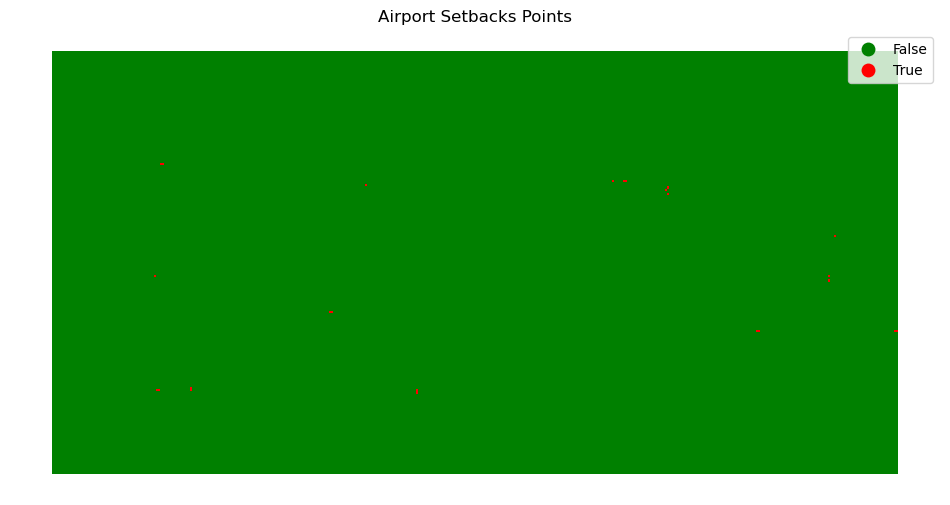

In [359]:
# Define colors for True and False
color_true = 'red'   # Color for grid cells with True values
color_false = 'green'  # Color for grid cells with False values

# Create a new figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot using different colors for True and False
environment_gdf.plot(column='airport_setbacks_points', ax=ax, 
                     cmap=plt.matplotlib.colors.ListedColormap([color_false, color_true]),
                     legend=True, 
                     categorical=True)

# Set the title and remove the axes for a cleaner look
plt.title('Airport Setbacks Points')
ax.axis('off')

# Show the plot
plt.show()

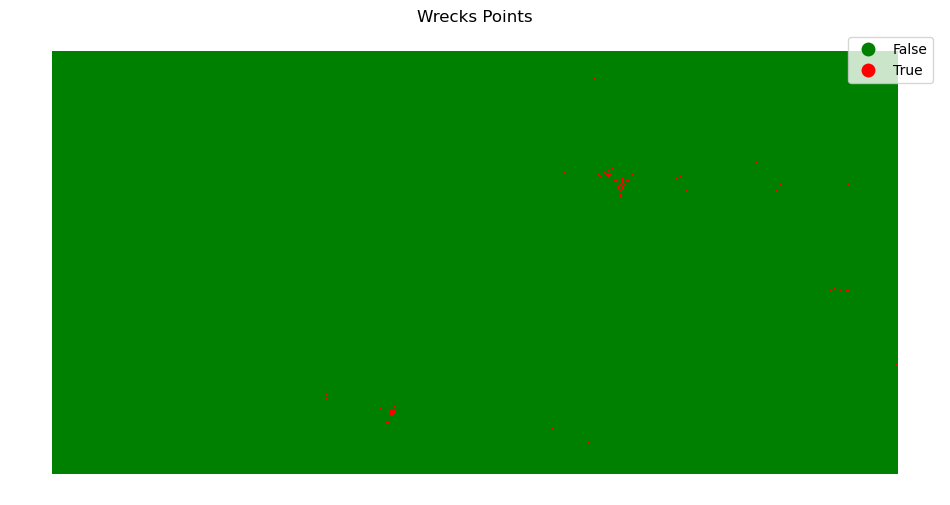

In [370]:
# Define colors for True and False
color_true = 'red'   # Color for grid cells with True values
color_false = 'green'  # Color for grid cells with False values

# Create a new figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot using different colors for True and False
environment_gdf.plot(column='wrecks_points', ax=ax, 
                     cmap=plt.matplotlib.colors.ListedColormap([color_false, color_true]),
                     legend=True, 
                     categorical=True)

# Set the title and remove the axes for a cleaner look
plt.title('Wrecks Points')
ax.axis('off')

# Show the plot
plt.show()

In [417]:
cyclone_gdf = get_gdf('../../data/PR100/Habitat/areas_protegidas_agencia.parquet')
cyclone_gdf.set_crs(environment_gdf.crs, inplace=True)
cyclone_gdf.to_crs(environment_gdf.crs, inplace=True)

In [418]:
# Add a column to environment_gdf to keep track of original indices
environment_gdf['original_index'] = environment_gdf.index

# Perform a spatial join
joined_gdf = gpd.sjoin(environment_gdf, cyclone_gdf, how='right', predicate='intersects')

# Create the binary mask column based on whether the original index appears in joined_gdf
environment_gdf['cyclone_path'] = environment_gdf['original_index'].isin(joined_gdf['original_index'])

# Optional: Drop the 'original_index' column if no longer needed
environment_gdf.drop(columns=['original_index'], inplace=True)


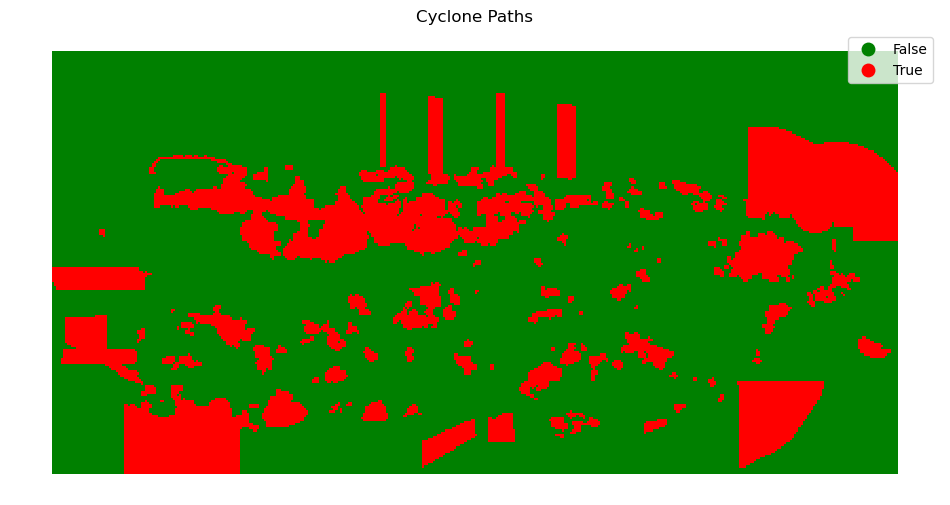

In [419]:
# Define colors for True and False
color_true = 'red'   # Color for grid cells with True values
color_false = 'green'  # Color for grid cells with False values

# Create a new figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot using different colors for True and False
environment_gdf.plot(column='cyclone_path', ax=ax, 
                     cmap=plt.matplotlib.colors.ListedColormap([color_false, color_true]),
                     legend=True, 
                     categorical=True)

# Set the title and remove the axes for a cleaner look
plt.title('Cyclone Paths')
ax.axis('off')

# Show the plot
plt.show()

In [425]:
wind_gdf = get_gdf('../../data/PR100/Hazards/tropical_cyclone_wind_exposure.parquet')

In [427]:
wind_gdf.T

,0,1,2,3,4,5,6,7,8,9,...,5954,5955,5956,5957,5958,5959,5960,5961,5962,5963
gridID,NE19-03 - 6387,NE19-03 - 6388,NE19-03 - 6389,NE19-03 - 6390,NE19-03 - 6391,NE19-03 - 6392,NE19-03 - 6393,NE19-03 - 6394,NE19-03 - 6395,NE19-03 - 6396,...,NE20-10 - 6481,NE20-10 - 6482,NE20-10 - 6483,NE20-10 - 6484,NE20-10 - 6485,NE20-10 - 6486,NE20-10 - 6487,NE20-10 - 6488,NE20-10 - 6489,NE20-10 - 6490
protractionNumber,NE19-03,NE19-03,NE19-03,NE19-03,NE19-03,NE19-03,NE19-03,NE19-03,NE19-03,NE19-03,...,NE20-10,NE20-10,NE20-10,NE20-10,NE20-10,NE20-10,NE20-10,NE20-10,NE20-10,NE20-10
leaseBlock,6387,6388,6389,6390,6391,6392,6393,6394,6395,6396,...,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490
occurrence34kt,71,72,72,72,71,72,73,73,74,72,...,68,70,70,70,72,71,71,69,69,70
occurrence50kt,28,28,28,28,29,30,30,29,29,29,...,25,25,25,25,26,28,28,27,28,28
occurrence64kt,10,10,10,10,11,11,11,10,10,10,...,13,13,14,14,14,14,14,12,12,12
intersectingStormTracks,0,1,2,1,3,1,0,0,0,1,...,2,2,2,2,1,1,1,1,1,3
occurrence64ktMajorHurricanes,6,6,6,6,6,6,6,6,6,6,...,5,5,6,6,6,6,6,5,5,5
returnInterval34kt,1.647887,1.625,1.625,1.625,1.647887,1.625,1.60274,1.60274,1.581081,1.625,...,1.720588,1.671429,1.671429,1.671429,1.625,1.647887,1.647887,1.695652,1.695652,1.671429
returnInterval50kt,4.178571,4.178571,4.178571,4.178571,4.034483,3.9,3.9,4.034483,4.034483,4.034483,...,4.68,4.68,4.68,4.68,4.5,4.178571,4.178571,4.333333,4.178571,4.178571


# Solar and wind data

In [2]:
def view_tif(filename):
    """
    Open and display a TIF file using rasterio and matplotlib.

    :param filename: Path to the TIF file.
    """

    # Open the TIF file
    with rasterio.open(filename) as src:
        # Read the first band
        band1 = src.read(1)

        # Display the image
        plt.imshow(band1, cmap='gray')
        plt.colorbar(label='Pixel values')
        plt.title('TIF File Contents')
        plt.xlabel('Column Number')
        plt.ylabel('Row Number')
        plt.show()

In [4]:
import rasterio

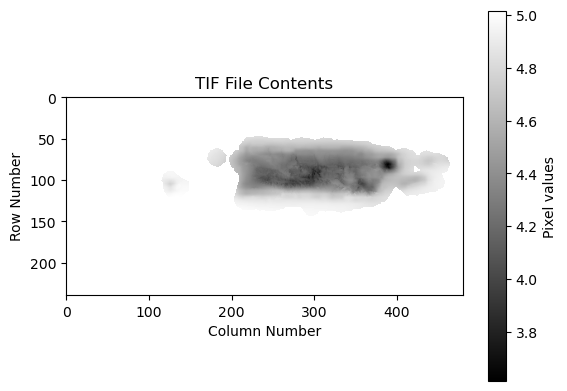

In [8]:
view_tif('../../data/RE/solar_atlas/Daily_PVOUT.tif')

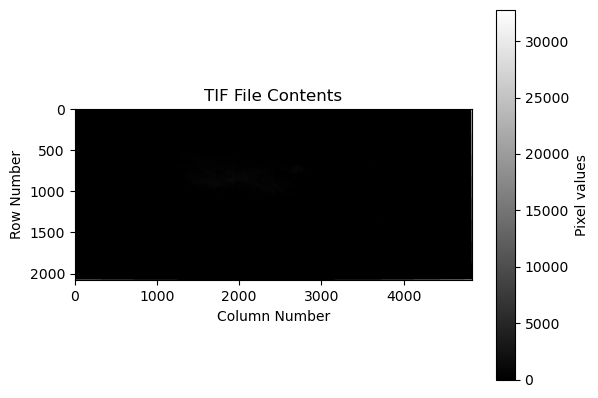

In [9]:
view_tif('../../data/PR100/Topography/elevation.tif')

Band 1 Sample Data:
 [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
Band 1 Mean: nan
Band 1 Median: nan
Band 1 Standard Deviation: nan
Band 1 Max value: nan
Band 1 Min value: nan


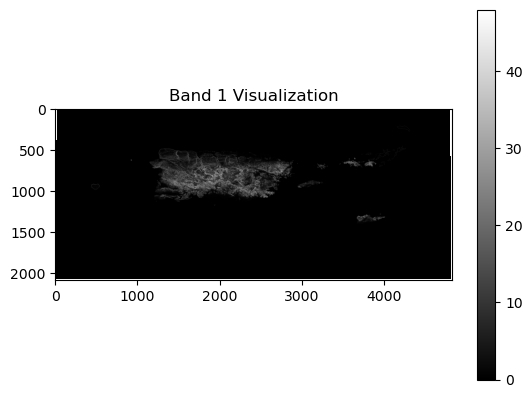

In [29]:
with rasterio.open('../../data/PR100/Topography/slope.tif') as src:
    # Number of bands
    num_bands = src.count

    for i in range(1, num_bands + 1):
        # Read each band
        band = src.read(i)

        # Inspect the first few rows and columns of the band
        print(f"Band {i} Sample Data:\n", band[:5, :5])

        # Basic statistics for each band
        print(f"Band {i} Mean:", np.mean(band))
        print(f"Band {i} Median:", np.median(band))
        print(f"Band {i} Standard Deviation:", np.std(band))
        print(f"Band {i} Max value:", np.max(band))
        print(f"Band {i} Min value:", np.min(band))

        # Plot the band
        plt.imshow(band, cmap='gray')
        plt.colorbar()
        plt.title(f'Band {i} Visualization')
        plt.show()

In [437]:
def get_tif_resolution(filename):
    """
    Get the resolution of a TIF file.

    :param filename: Path to the TIF file.
    :return: A tuple representing the resolution (width, height) of each pixel.
    """
    with rasterio.open(filename) as src:
        # The resolution is in src.res, which returns (width, height)
        resolution = src.res
        return resolution

In [438]:
resolution = get_tif_resolution('../../data/wind_atlas/PRI_power-density_100m.tif')
print("Resolution (width, height):", resolution)

Resolution (width, height): (0.002500000000000124, 0.002500000000000124)


In [439]:
def get_tif_dimensions(filename):
    """
    Get the dimensions of a TIF file.

    :param filename: Path to the TIF file.
    :return: A tuple representing the dimensions (width, height) of the image.
    """
    with rasterio.open(filename) as src:
        width = src.width
        height = src.height
        return (width, height)

In [440]:
dimensions = get_tif_dimensions('../../data/wind_atlas/PRI_power-density_100m.tif')
print("Dimensions (width, height):", dimensions)

Dimensions (width, height): (1484, 2770)


In [441]:
def get_tif_crs(filename):
    """
    Get the CRS of a TIF file.

    :param filename: Path to the TIF file.
    :return: CRS information of the TIF file.
    """
    with rasterio.open(filename) as src:
        crs = src.crs
        return crs

In [442]:
crs_info = get_tif_crs('../../data/wind_atlas/PRI_power-density_100m.tif')
print("CRS information:", crs_info)

CRS information: EPSG:4326
